# Forecast Gruppe 6

## 1 Daten einlesen

In [592]:
%pip install numpy
%pip install pandas
%pip install matplotlib.pylab
%pip install seaborn
%pip install statsmodels
%pip install scikit-learn
%pip install xgboost
%pip install pmdarima
%pip install mlxtend
%pip install sklearn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pylab (from versions: none)
ERROR: No matching distribution found for matplotlib.pylab


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [593]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import datetime
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.ensemble

%matplotlib inline
sns.set(rc={'figure.figsize':(10,10)})

In [594]:
df_cal = pd.read_csv('../Data/calendar.csv', sep=',')
df_cal.head()

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1
1,2011-03-02,11105,NaN,NaN,NaN,NaN,1
2,2011-03-03,11105,NaN,NaN,NaN,NaN,1
3,2011-03-04,11105,NaN,NaN,NaN,NaN,1
4,2011-03-05,11106,NaN,NaN,NaN,NaN,1


In [595]:
df_price = pd.read_csv('../Data/prices.csv', sep=',')
df_price.head()

,Unnamed: 0,item_id,week_id,price
0,0,HOBBIES_1_001,11325,9.58
1,1,HOBBIES_1_001,11326,9.58
2,2,HOBBIES_1_001,11327,8.26
3,3,HOBBIES_1_001,11328,8.26
4,4,HOBBIES_1_001,11329,8.26


In [596]:
df_sales = pd.read_csv('../Data/sales.csv', sep=',')
df_sales


,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
5570518,2016-02-29,FOODS_3_823,FOODS_3,FOODS,2
5570519,2016-02-29,FOODS_3_824,FOODS_3,FOODS,0
5570520,2016-02-29,FOODS_3_825,FOODS_3,FOODS,0
5570521,2016-02-29,FOODS_3_826,FOODS_3,FOODS,1


## 2 Erstellung Basisdatensatz

### 2.1 Mergen der Datensätze
Calendar und Sales über das Datum mergen


In [597]:
df_calsales = pd.merge(df_cal,df_sales,how='left',on='date')
df_calsales

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5570549,2016-03-27,11609,Easter,Cultural,NaN,NaN,0,NaN,NaN,NaN,NaN
5570550,2016-03-28,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
5570551,2016-03-29,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
5570552,2016-03-30,11609,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [598]:
df_calsales_past = df_calsales[df_calsales['date']<'2016-03-01']
df_calsales_past

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5570518,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,2.0
5570519,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,0.0
5570520,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,0.0
5570521,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,1.0


In [599]:
df_calsales_future = df_calsales[df_calsales['date']>='2016-03-01']
df_calsales_future = df_calsales_future.drop(columns = ['item_id','dept_id','cat_id'])
df_calsales_future

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,sales
5570523,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN
5570524,2016-03-02,11605,NaN,NaN,NaN,NaN,1,NaN
5570525,2016-03-03,11605,NaN,NaN,NaN,NaN,1,NaN
5570526,2016-03-04,11605,NaN,NaN,NaN,NaN,1,NaN
5570527,2016-03-05,11606,NaN,NaN,NaN,NaN,1,NaN
5570528,2016-03-06,11606,NaN,NaN,NaN,NaN,1,NaN
5570529,2016-03-07,11606,NaN,NaN,NaN,NaN,1,NaN
5570530,2016-03-08,11606,NaN,NaN,NaN,NaN,1,NaN
5570531,2016-03-09,11606,NaN,NaN,NaN,NaN,1,NaN
5570532,2016-03-10,11606,NaN,NaN,NaN,NaN,1,NaN


In [600]:
df_future = pd.merge(df_calsales_future,df_price,how='left',on=['week_id'])
df_future = df_future.drop(columns = 'Unnamed: 0')
df_future

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,sales,item_id,price
0,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_001,8.26
1,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_002,3.97
2,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_003,2.97
3,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_004,4.64
4,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_005,2.88
...,...,...,...,...,...,...,...,...,...,...
94514,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_823,2.88
94515,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_824,2.48
94516,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_825,3.98
94517,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_826,1.28


In [601]:
df_item_description = df_sales[df_sales['date']==	'2011-03-01']
df_item_description

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
3044,2011-03-01,FOODS_3_823,FOODS_3,FOODS,0
3045,2011-03-01,FOODS_3_824,FOODS_3,FOODS,0
3046,2011-03-01,FOODS_3_825,FOODS_3,FOODS,0
3047,2011-03-01,FOODS_3_826,FOODS_3,FOODS,0


In [602]:
df_future = pd.merge(df_future,df_item_description[['item_id','dept_id','cat_id']],how='left',on=['item_id'])
df_future

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,sales,item_id,price,dept_id,cat_id
0,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_001,8.26,HOBBIES_1,HOBBIES
1,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_002,3.97,HOBBIES_1,HOBBIES
2,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_003,2.97,HOBBIES_1,HOBBIES
3,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_004,4.64,HOBBIES_1,HOBBIES
4,2016-03-01,11605,NaN,NaN,NaN,NaN,1,NaN,HOBBIES_1_005,2.88,HOBBIES_1,HOBBIES
...,...,...,...,...,...,...,...,...,...,...,...,...
94514,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_823,2.88,FOODS_3,FOODS
94515,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_824,2.48,FOODS_3,FOODS
94516,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_825,3.98,FOODS_3,FOODS
94517,2016-03-31,11609,NaN,NaN,NaN,NaN,0,NaN,FOODS_3_826,1.28,FOODS_3,FOODS


In [603]:
df_future.isna().sum()

date                0
week_id             0
event_name_1    85372
event_type_1    85372
event_name_2    94519
event_type_2    94519
snap                0
sales           94519
item_id             0
price               0
dept_id             0
cat_id              0
dtype: int64

In [604]:
df_calsales_past

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5570518,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,2.0
5570519,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,0.0
5570520,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,0.0
5570521,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,1.0


In [605]:
df_past = pd.merge(df_calsales_past,df_price,how='left',on=['item_id','week_id'])
df_past = df_past.drop(columns = 'Unnamed: 0')
df_past

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5570518,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,2.0,2.88
5570519,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,0.0,2.68
5570520,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,0.0,3.98
5570521,2016-02-29,11605,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,1.0,1.28


In [606]:
list_df = [df_past,df_future]
df = pd.concat(list_df)
df = df.reset_index(drop=True)
df

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5665037,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88
5665038,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48
5665039,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98
5665040,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,NaN,1.28


### 2.2 Testen auf Robustheit des Merger

In [607]:
df[(df['item_id']=='HOBBIES_1_010')&(df['week_id']==11105)]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
9,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,3.17
3058,2011-03-02,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,3.17
6107,2011-03-03,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,3.17
9156,2011-03-04,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_010,HOBBIES_1,HOBBIES,0.0,3.17


In [608]:
df_price[df_price['week_id']==11105]

,Unnamed: 0,item_id,week_id,price
1428,1516,HOBBIES_1_008,11105,0.42
1694,1798,HOBBIES_1_009,11105,1.56
1960,2080,HOBBIES_1_010,11105,3.17
2432,2580,HOBBIES_1_012,11105,5.98
3134,3322,HOBBIES_1_015,11105,0.72
...,...,...,...,...
654659,696398,FOODS_3_819,11105,1.98
654925,696680,FOODS_3_820,11105,1.57
655348,697131,FOODS_3_822,11105,4.28
655805,697616,FOODS_3_824,11105,2.48


In [609]:
df_price[(df_price['week_id']==11105) & (df_price['item_id']=='HOBBIES_1_010')]

,Unnamed: 0,item_id,week_id,price
1960,2080,HOBBIES_1_010,11105,3.17


Vergleich Preiswerte aus df_price mit gemergetem Dataframe


In [610]:
df_sales[(df_sales['date']>='2011-03-01')&(df_sales['date']<='2011-03-21')&(df_sales['item_id']=='HOBBIES_1_001')]

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
3049,2011-03-02,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
6098,2011-03-03,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
9147,2011-03-04,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
12196,2011-03-05,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
15245,2011-03-06,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
18294,2011-03-07,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
21343,2011-03-08,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
24392,2011-03-09,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
27441,2011-03-10,HOBBIES_1_001,HOBBIES_1,HOBBIES,0


Vergleich Saleswerte aus df_sales mit gemergetem Dataframe

In [611]:
df.dtypes

date             object
week_id           int64
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
snap              int64
item_id          object
dept_id          object
cat_id           object
sales           float64
price           float64
dtype: object

In [612]:
df['date'] = pd.to_datetime(df['date'])

In [613]:
df.dtypes

date            datetime64[ns]
week_id                  int64
event_name_1            object
event_type_1            object
event_name_2            object
event_type_2            object
snap                     int64
item_id                 object
dept_id                 object
cat_id                  object
sales                  float64
price                  float64
dtype: object

Um mit dem Datum rechnen zu können ändern wir den Datentyp von Objekt zu einem datetime-objekt.

## 3 Datenexploration

### 3.1 Allgemein

In [614]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1858 non-null   object
 1   week_id       1858 non-null   int64 
 2   event_name_1  151 non-null    object
 3   event_type_1  151 non-null    object
 4   event_name_2  4 non-null      object
 5   event_type_2  4 non-null      object
 6   snap          1858 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 101.7+ KB


In [615]:
df_cal.describe()

,week_id,snap
count,1858.000000,1858.000000
mean,11339.624327,0.328310
std,146.305645,0.469725
min,11105.000000,0.000000
25%,11219.000000,0.000000
50%,11334.000000,0.000000
75%,11447.000000,1.000000
max,11609.000000,1.000000


In [616]:
df_cal['date']

0       2011-03-01
1       2011-03-02
2       2011-03-03
3       2011-03-04
4       2011-03-05
           ...    
1853    2016-03-27
1854    2016-03-28
1855    2016-03-29
1856    2016-03-30
1857    2016-03-31
Name: date, Length: 1858, dtype: object

In [617]:
df_cal['event_name_1'].unique()

array([nan, 'LentStart', 'LentWeek2', 'StPatricksDay', 'Purim End',
       'OrthodoxEaster', 'Pesach End', 'Cinco De Mayo', "Mother's day",
       'MemorialDay', 'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'SuperBowl',
       'ValentinesDay', 'PresidentsDay', 'Easter'], dtype=object)

In [618]:
df_cal['event_name_1'].value_counts()

LentStart              6
StPatricksDay          6
Purim End              6
LentWeek2              6
Halloween              5
PresidentsDay          5
ValentinesDay          5
SuperBowl              5
MartinLutherKingDay    5
OrthodoxChristmas      5
NewYear                5
Chanukah End           5
Christmas              5
Thanksgiving           5
VeteransDay            5
EidAlAdha              5
LaborDay               5
ColumbusDay            5
Eid al-Fitr            5
Ramadan starts         5
IndependenceDay        5
NBAFinalsEnd           5
NBAFinalsStart         5
MemorialDay            5
Mother's day           5
Pesach End             5
Easter                 5
Father's day           4
Cinco De Mayo          4
OrthodoxEaster         4
Name: event_name_1, dtype: int64

In [619]:
df_cal['event_name_1'].value_counts().sum()

151

Von 1858 Datensätzen finden 151 an einem Feiertag statt.

In [620]:
df_cal['event_name_2'].value_counts()

Easter            1
Cinco De Mayo     1
OrthodoxEaster    1
Father's day      1
Name: event_name_2, dtype: int64

Doppelter Feiertag findet nur 4 mal im Datensatz statt. --> eher unrelevant


In [621]:
df_cal['event_name_2'].unique()

array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

In [622]:
df_cal['event_type_1'].unique()

array([nan, 'Religious', 'Cultural', 'National', 'Sporting'], dtype=object)

In [623]:
df_cal['event_type_2'].unique()

array([nan, 'Cultural', 'Religious'], dtype=object)

In [624]:
df_cal[df_cal['event_name_1'] == 'Easter']

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
404,2012-04-08,11211,Easter,Cultural,NaN,NaN,1
761,2013-03-31,11310,Easter,Cultural,NaN,NaN,0
1146,2014-04-20,11412,Easter,Cultural,OrthodoxEaster,Religious,0
1496,2015-04-05,11510,Easter,Cultural,NaN,NaN,1
1853,2016-03-27,11609,Easter,Cultural,NaN,NaN,0


In [625]:
df_cal[df_cal['event_name_2'] == 'Easter']

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
54,2011-04-24,11113,OrthodoxEaster,Religious,Easter,Cultural,0


Event 2 falls 2 Feiertage am selben Tag stattfinden.


In [626]:
df_cal['snap'].value_counts()

0    1248
1     610
Name: snap, dtype: int64

In [627]:
snap_test = df_cal[(df_cal['week_id']>=11105)&(df_cal['week_id']<=11130)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


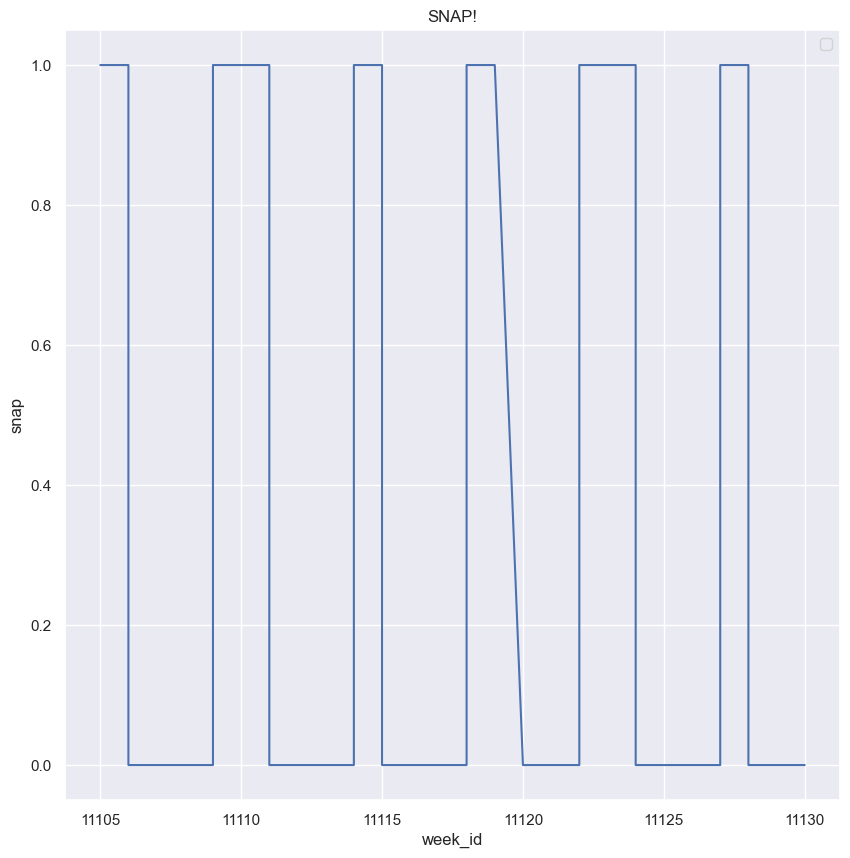

In [628]:
snap_test = df_cal[(df_cal['week_id']>=11105)&(df_cal['week_id']<=11130)]

plt.plot(snap_test['week_id'],snap_test['snap'])
plt.title('SNAP!')
plt.xlabel("week_id")
plt.ylabel("snap")
plt.legend(loc='upper right')
plt.show()

Dauer des Snap Angebots ist immer unterschiedlich lang.

### 3.2 Prices

In [629]:
df_price = df_price.drop(columns=['Unnamed: 0'])
df_price

,item_id,week_id,price
0,HOBBIES_1_001,11325,9.58
1,HOBBIES_1_001,11326,9.58
2,HOBBIES_1_001,11327,8.26
3,HOBBIES_1_001,11328,8.26
4,HOBBIES_1_001,11329,8.26
...,...,...,...
656545,FOODS_3_827,11605,1.00
656546,FOODS_3_827,11606,1.00
656547,FOODS_3_827,11607,1.00
656548,FOODS_3_827,11608,1.00


In [630]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656550 entries, 0 to 656549
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   item_id  656550 non-null  object 
 1   week_id  656550 non-null  int64  
 2   price    656550 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.0+ MB


Price = durchschnittlicher Verkaufspreis der Items pro jeweiliger Woche

Keine Nan's

In [631]:
df_price['item_id'].value_counts()

HOUSEHOLD_2_429    266
HOUSEHOLD_2_368    266
HOUSEHOLD_2_384    266
HOUSEHOLD_2_383    266
FOODS_3_495        266
                  ... 
FOODS_2_248         23
FOODS_2_117         14
FOODS_2_209         14
FOODS_3_296         11
FOODS_3_595          7
Name: item_id, Length: 3049, dtype: int64

In [632]:
df_price['price'].describe()

count    656550.000000
mean          4.412243
std           3.395917
min           0.010000
25%           2.220000
50%           3.470000
75%           5.770000
max          30.980000
Name: price, dtype: float64

In [633]:
df_price[['item_id','price']][df_price['price']>30].groupby(by='item_id').count()

,price
item_id,
HOBBIES_1_060,110
HOBBIES_1_225,109
HOBBIES_1_361,109


Es gibt 3 Items mit einem Verkaufspreis in der jeweiligen Woche >30

In [634]:
df_price['week_id'].value_counts()

11608    3049
11609    3049
11607    3049
11606    3049
11605    3049
         ... 
11109    1509
11108    1490
11107    1471
11106    1445
11105    1413
Name: week_id, Length: 266, dtype: int64

In unterschiedlichen Wochen gibt es unterschiedlich viele Preise (da Anzahl angebotener Items über Zeit zunimmt)

### 3.3 Sales

Sales = Abverkauf in Stück pro Produkt pro Tag (auch wenn das Produkt nicht verkauft wurde)



In [635]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570523 entries, 0 to 5570522
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   date     object
 1   item_id  object
 2   dept_id  object
 3   cat_id   object
 4   sales    int64 
dtypes: int64(1), object(4)
memory usage: 212.5+ MB


In [636]:
df_sales[df_sales['sales'].isna()]

,date,item_id,dept_id,cat_id,sales


In [637]:
df_sales['sales'].describe()

count    5.570523e+06
mean     1.319099e+00
std      4.069521e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      6.480000e+02
Name: sales, dtype: float64

In [638]:
df_sales[df_sales['sales']==0]

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
5570512,2016-02-29,FOODS_3_817,FOODS_3,FOODS,0
5570515,2016-02-29,FOODS_3_820,FOODS_3,FOODS,0
5570516,2016-02-29,FOODS_3_821,FOODS_3,FOODS,0
5570519,2016-02-29,FOODS_3_824,FOODS_3,FOODS,0


In [639]:
df_sales[df_sales['date']=='2011-03-01']

,date,item_id,dept_id,cat_id,sales
0,2011-03-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-03-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-03-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-03-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-03-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0
...,...,...,...,...,...
3044,2011-03-01,FOODS_3_823,FOODS_3,FOODS,0
3045,2011-03-01,FOODS_3_824,FOODS_3,FOODS,0
3046,2011-03-01,FOODS_3_825,FOODS_3,FOODS,0
3047,2011-03-01,FOODS_3_826,FOODS_3,FOODS,0


Alle 3049 Produkte haben für jedes Date eine Verkaufsanzahl.

<AxesSubplot:xlabel='cat_id'>

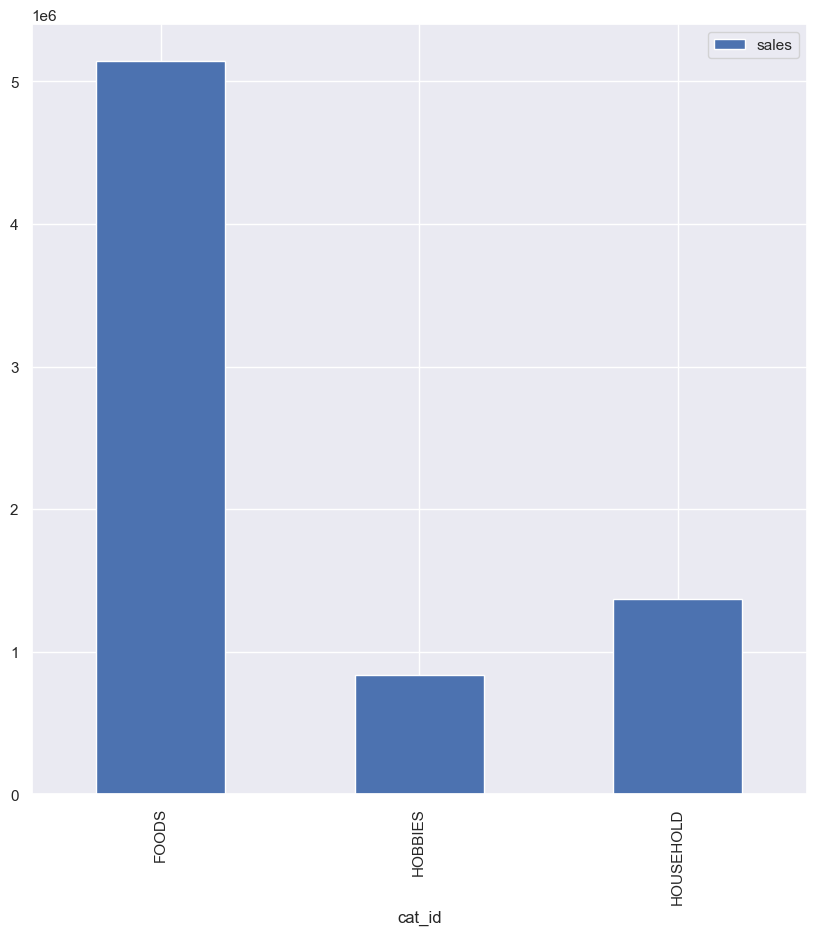

In [640]:
df_sales.groupby(by='cat_id').sum().plot.bar()

<AxesSubplot:xlabel='date', ylabel='sales'>

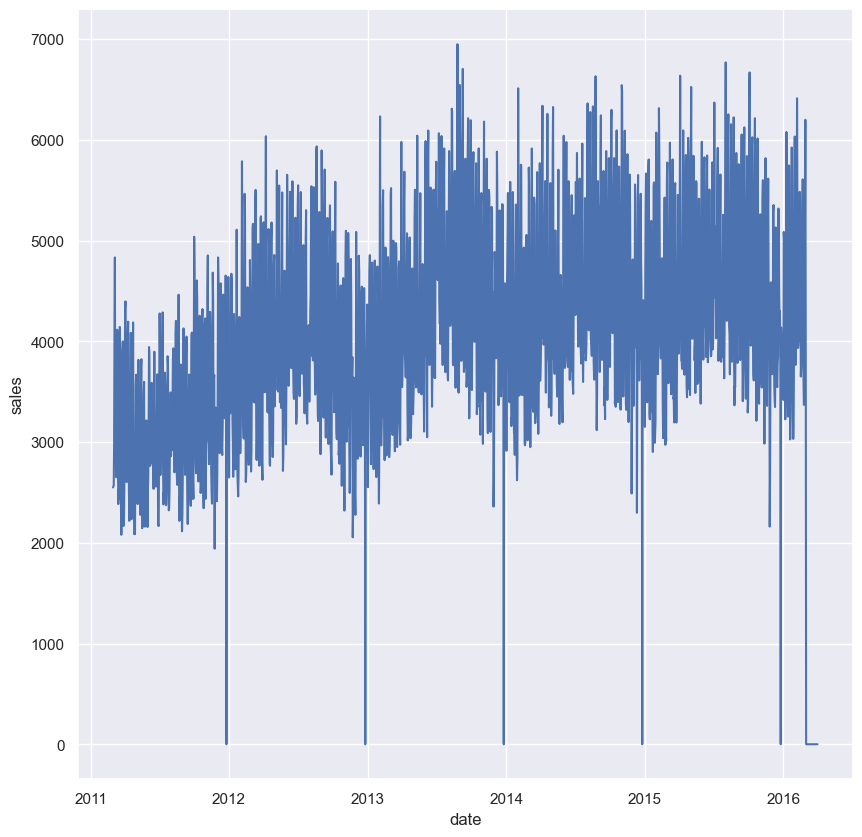

In [641]:
df_plot3 = df[['date', 'sales', 'price']].groupby(by='date').agg({'sales': 'sum', 'price': 'mean'})

sns.lineplot(x=df_plot3.index, y='sales', data=df_plot3)

In [642]:
df_plot3.iloc[290:310]

,sales,price
date,,
2011-12-16,3399.0,4.268003
2011-12-17,4463.0,4.274261
2011-12-18,4253.0,4.274261
2011-12-19,3333.0,4.274261
2011-12-20,3236.0,4.274261
2011-12-21,3367.0,4.274261
2011-12-22,3609.0,4.274261
2011-12-23,4652.0,4.274261
2011-12-24,3454.0,4.275740


Bei der Betrachtung nach einzelnen Tagen fällt der 25.12. jedes Jahr auf mit Sales von 0 --> Filiale an Weihnachten geschlossen

<AxesSubplot:ylabel='sales'>

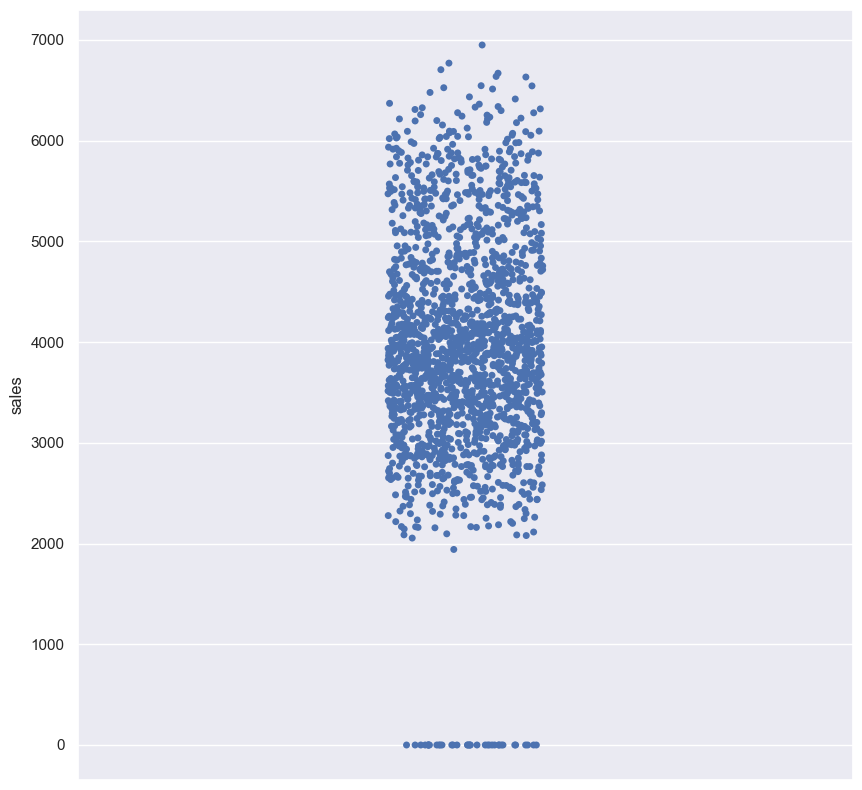

In [643]:
sns.stripplot(
    data=df_plot3,
    y='sales'
)

Im Schnitt befinden sich die täglichen Sales zwischen 3000 und 5000

Text(0.5, 1.0, 'Avg Price per day')

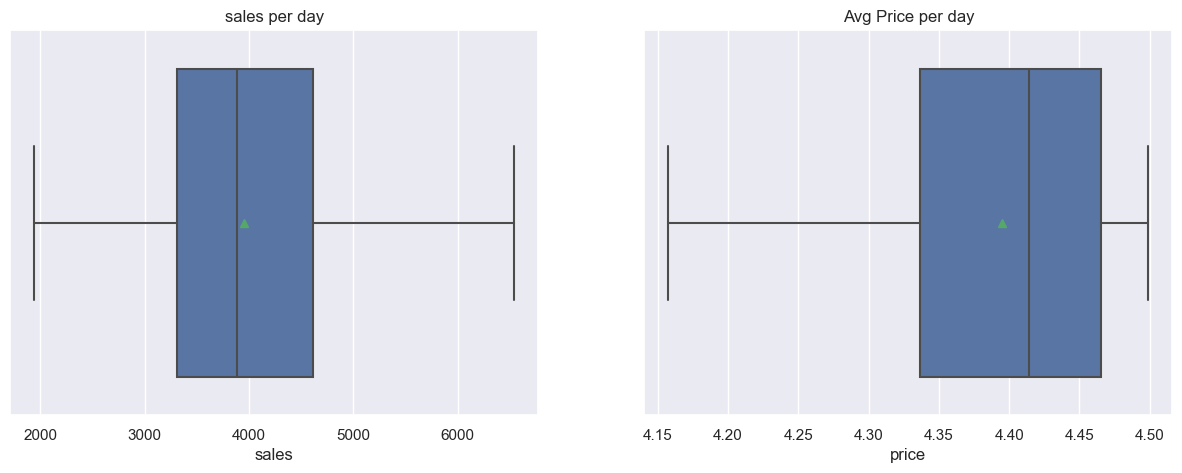

In [644]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
#fig.suptitle('')

sns.boxplot(data=df_plot3, x='sales', showmeans=True, showfliers=False, ax=axes[0])
axes[0].set_title('sales per day')

sns.boxplot(data=df_plot3, x='price', showmeans=True, showfliers=False, ax=axes[1])
axes[1].set_title('Avg Price per day')


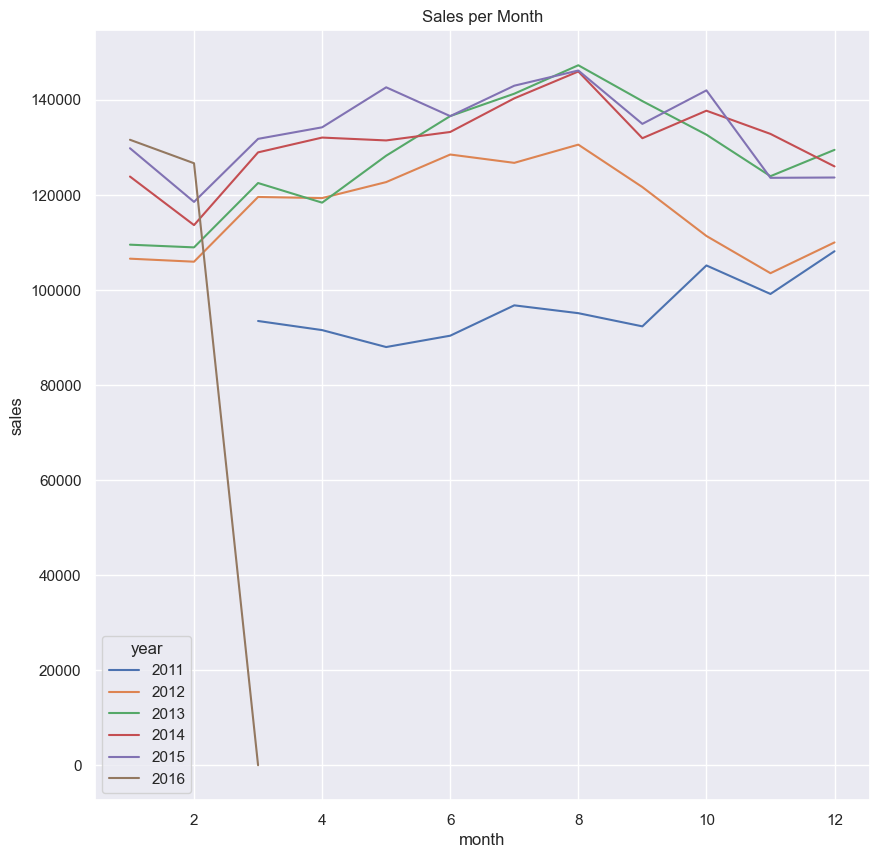

In [645]:
df_plot4 = df[['date', 'sales']].groupby(by='date').sum()
df_plot4.reset_index(inplace=True)
df_plot4['year'] = df_plot4['date'].dt.year
df_plot4['month'] = df_plot4['date'].dt.month

plot = sns.lineplot(
    data=df_plot4,
    x='month',
    y='sales',
    hue='year',
    estimator=sum,
    ci=None,
    palette='deep'
).set(title='Sales per Month')

In [646]:
df_plot5 = df[['date', 'sales']].groupby(by='date').sum() #Glaube das war df_plot5

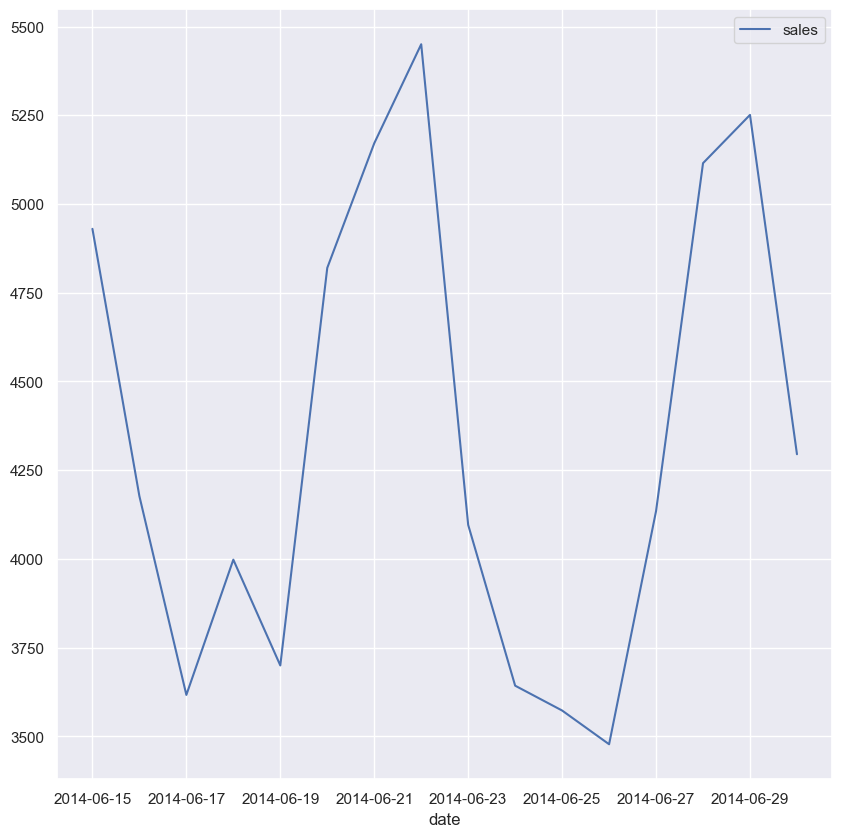

In [647]:
data = df_plot5.loc['2014-06-15':'2014-06-30']
g = sns.lineplot(data = data)

Wir sehen in den Sales Daten einen starken 7-tägigen saisonalen Verlauf. Bis Donnerstags sinken die Sales stark und steigen bis Sonntag an. 
Deshalb rechnen wir den 7tägigen Trend raus. 

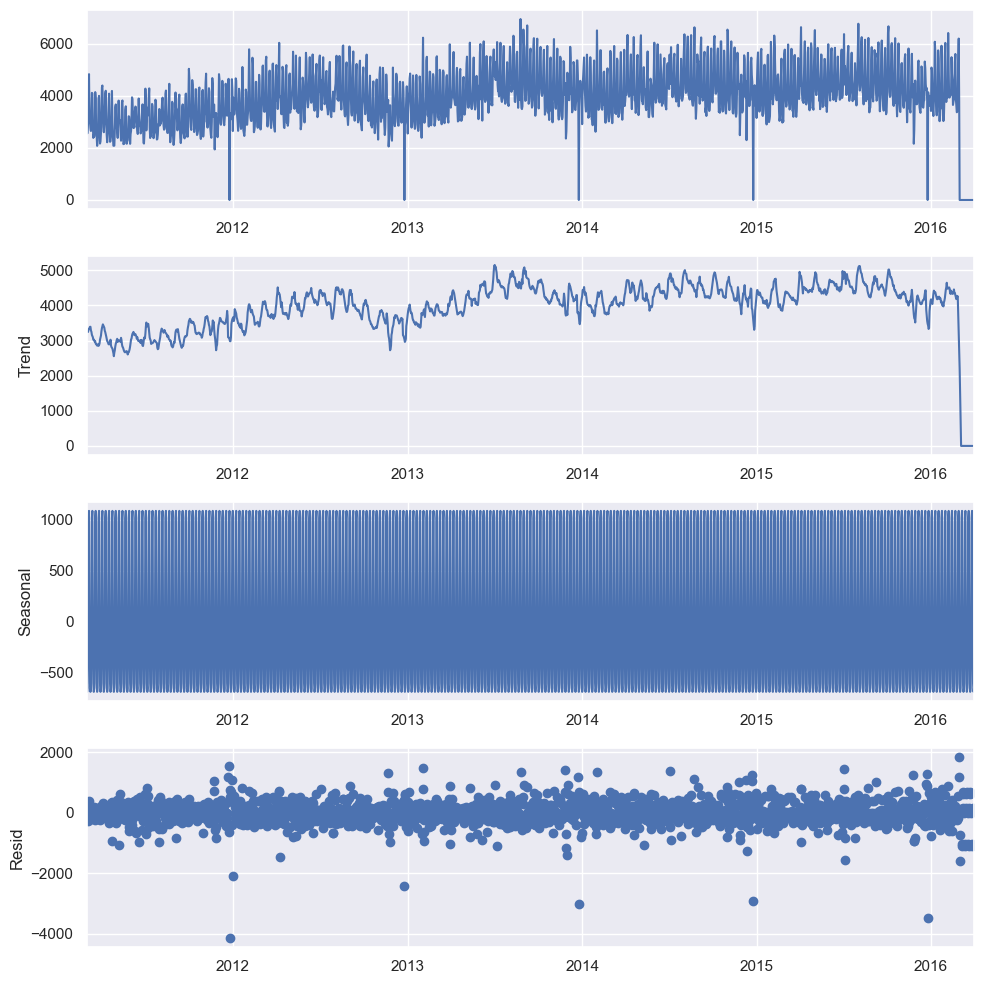

In [648]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(
    x=df_plot5,
    period=7
)

decompose.plot()
plt.show()

Zur Prüfung vergleichen wir das Ergebnis mit einem 14tägigen saisonalen Effekt.

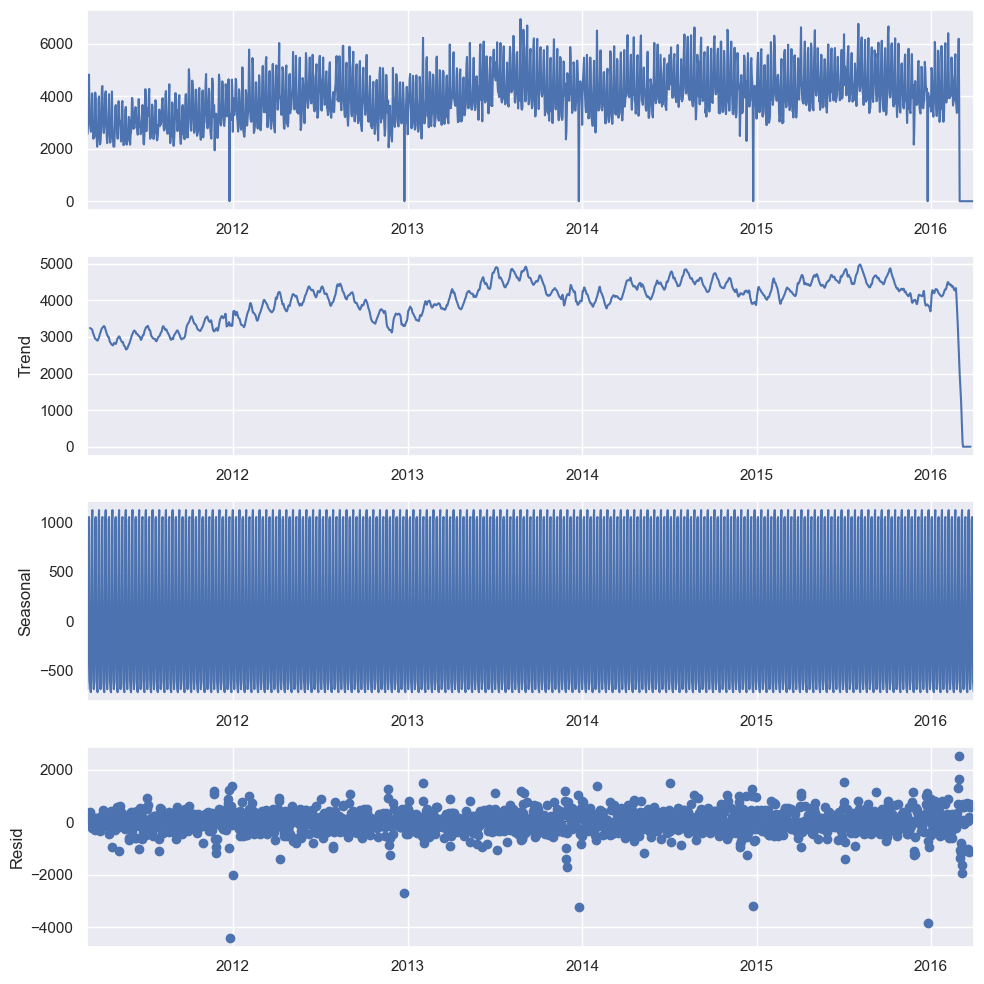

In [649]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose2 = seasonal_decompose(
    x=df_plot5,
    period=14
)

decompose2.plot()
plt.show()

Hier sehen wir jedoch keine signifikanten Änderungen im Trend. 

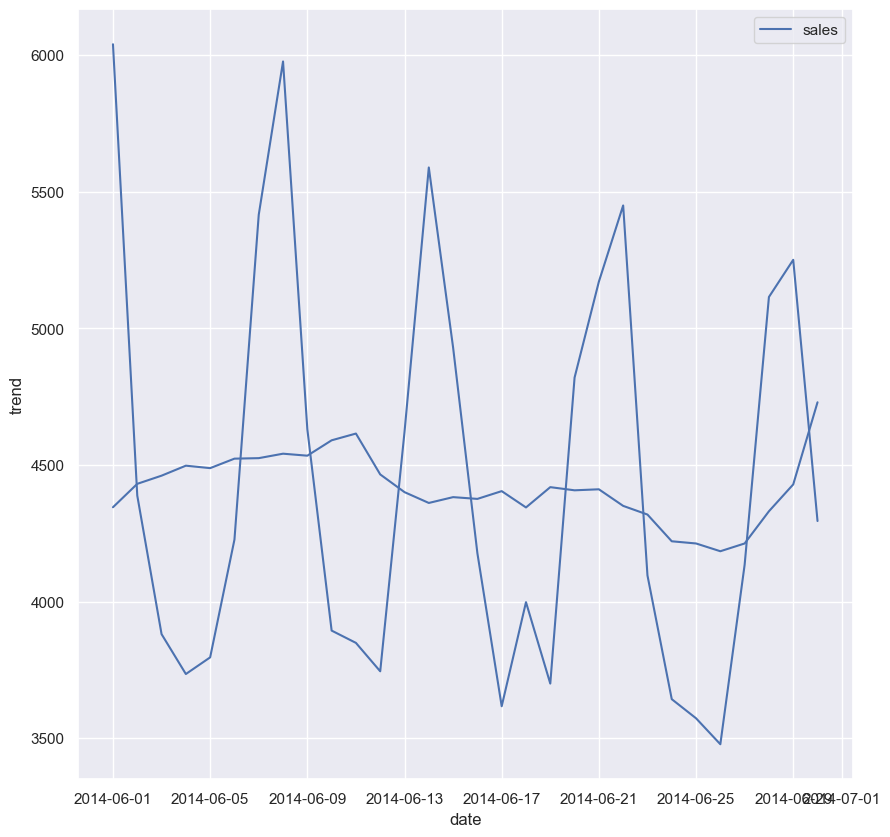

In [650]:
data = decompose.trend.loc['2014-06-01':'2014-06-30']
g1 = sns.lineplot(data = data)

data = df_plot5.loc['2014-06-01':'2014-06-30']
g2 = sns.lineplot(data = data, ax=g1)



Wenn wir uns den Trend ohne die 7tägige Saisonalität anschauen sehen wir keine auffälligen Saisonalitäten mehr.

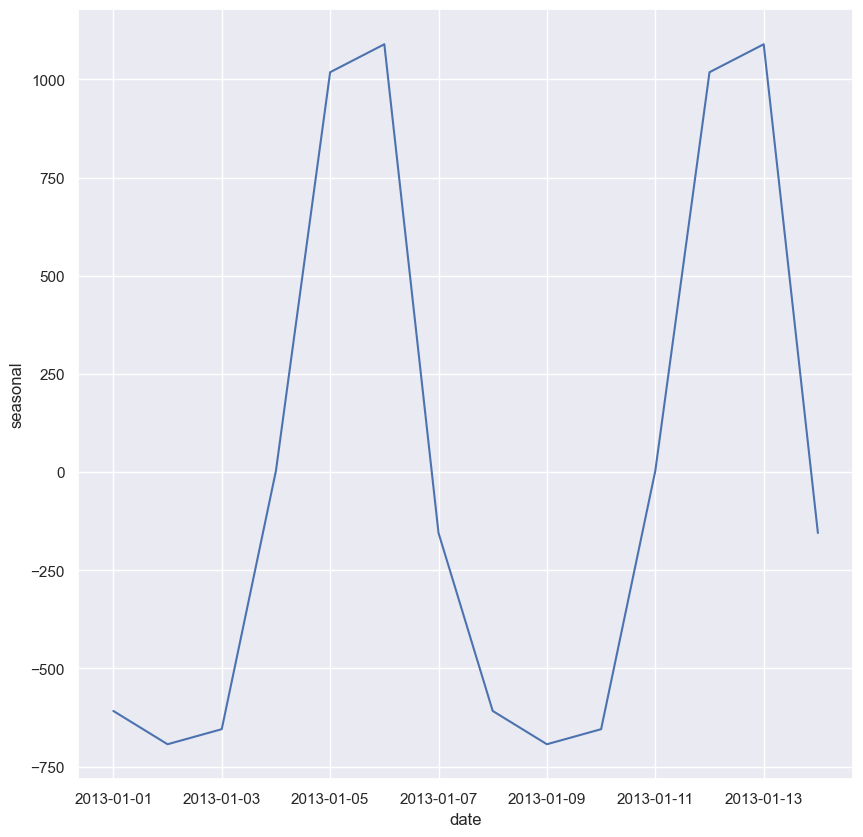

In [651]:
data = decompose.seasonal.loc['2013-01-01':'2013-01-14']
g = sns.lineplot(data = data)

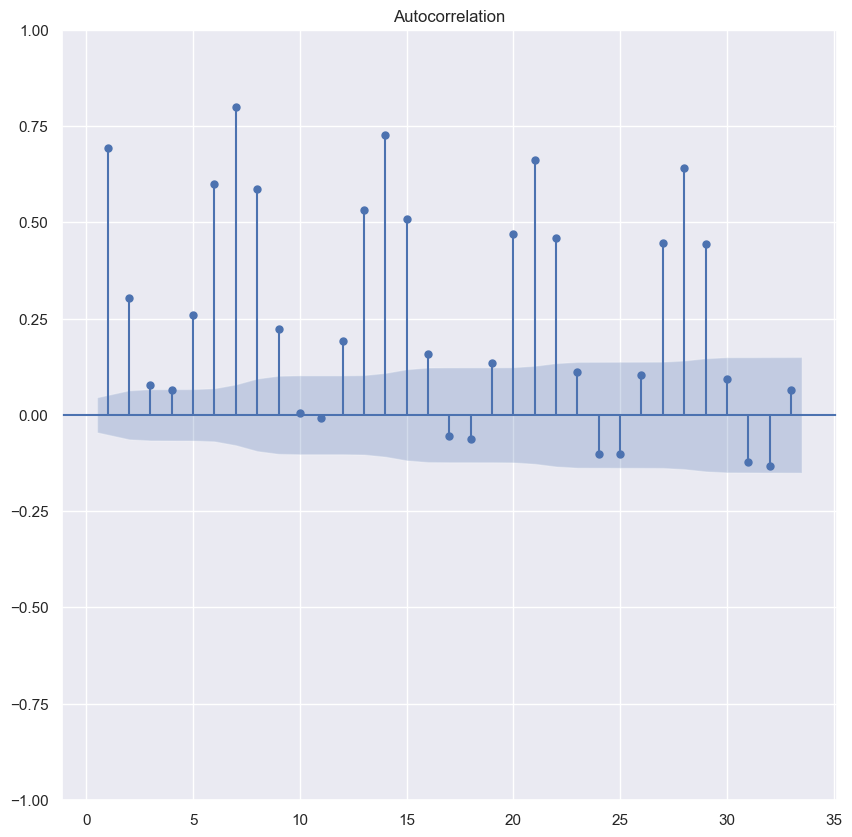

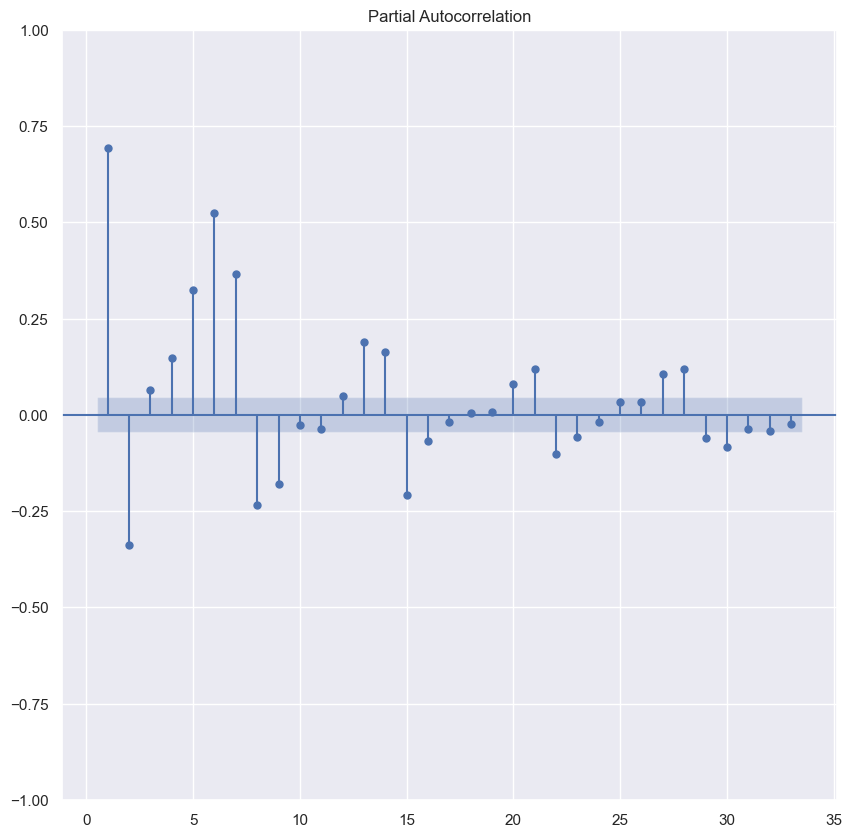

In [652]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

data = df_plot5

plot_acf(data, zero = False)
plt.show()
plot_pacf(data, zero = False)
plt.show()

## 4 Datenbereinigung

### 4.1 NaN Werte in Sales


In [653]:
df[df['sales'].isnull()==True]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
5570523,2016-03-01,11605,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,NaN,8.26
5570524,2016-03-01,11605,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,NaN,3.97
5570525,2016-03-01,11605,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,NaN,2.97
5570526,2016-03-01,11605,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,NaN,4.64
5570527,2016-03-01,11605,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,NaN,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...
5665037,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88
5665038,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48
5665039,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98
5665040,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,NaN,1.28


NaN Werte in Sales gibt es nur ab dem 01.03.2016 da ab dort keine Sales Daten mehr verfügbar sind, der Kalendar jedoch bis zum 31.03.2016 geht.

In [654]:
df[df['price'].isnull()==True]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5506264,2016-02-08,11602,NaN,NaN,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5509313,2016-02-09,11602,NaN,NaN,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5512362,2016-02-10,11602,LentStart,Religious,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5515411,2016-02-11,11602,NaN,NaN,NaN,NaN,0,FOODS_3_595,FOODS_3,FOODS,0.0,NaN


In [655]:
df[df['price'].isna()==True]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5506264,2016-02-08,11602,NaN,NaN,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5509313,2016-02-09,11602,NaN,NaN,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5512362,2016-02-10,11602,LentStart,Religious,NaN,NaN,1,FOODS_3_595,FOODS_3,FOODS,0.0,NaN
5515411,2016-02-11,11602,NaN,NaN,NaN,NaN,0,FOODS_3_595,FOODS_3,FOODS,0.0,NaN


In [656]:
df[(df['price'].isna()==True)&(df['sales']>0)]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price


Price ist nur NaN oder 0 wenn Sales auch 0 sind. Wahrscheinlich wenn das Produkt noch nicht verkauft wurde.

### 4.2 Week ID

<AxesSubplot:xlabel='week_id', ylabel='sales'>

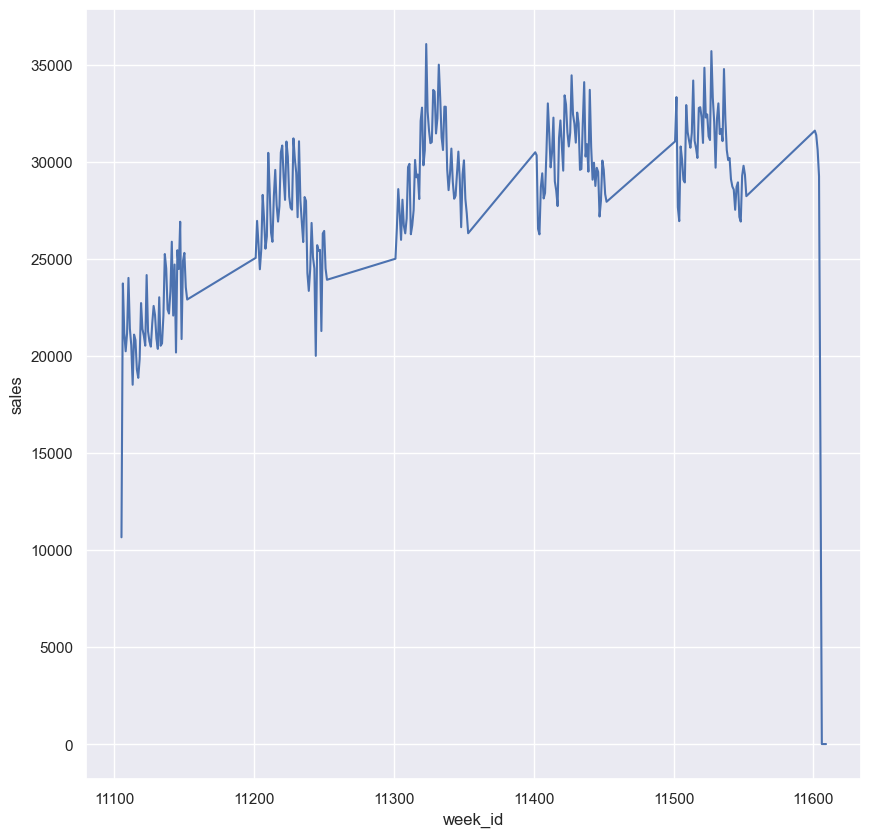

In [657]:
df_plot = df[['week_id', 'sales', 'price']].groupby(by='week_id').agg({'sales': 'sum', 'price': 'mean'})

sns.lineplot(x=df_plot.index, y='sales', data=df_plot)

Wenn wir anhand der Week_id gruppieren fehlen uns Zeiträume

In [658]:
df_plot.loc['11150':'11201']


,sales,price
week_id,,
11150,25308.0,4.254329
11151,23540.0,4.261167
11152,22905.0,4.262562
11201,25052.0,4.265123


In [659]:
df_cal[df_cal['week_id']== 11151]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
319,2012-01-14,11151,NaN,NaN,NaN,NaN,0
320,2012-01-15,11151,NaN,NaN,NaN,NaN,0
321,2012-01-16,11151,MartinLutherKingDay,National,NaN,NaN,0
322,2012-01-17,11151,NaN,NaN,NaN,NaN,0
323,2012-01-18,11151,NaN,NaN,NaN,NaN,0
324,2012-01-19,11151,NaN,NaN,NaN,NaN,0
325,2012-01-20,11151,NaN,NaN,NaN,NaN,0


Week_id endet immer in der Endung 52 und springt dann zum nächsten Hunderter. Daher erstellen wir eine eigene Spalte mit der KW/Jahr.

In [660]:
df.head()

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN


In [661]:
import datetime
df['yearcw'] = df['date'].dt.year.astype('str') + df['date'].dt.strftime('%W')


<AxesSubplot:xlabel='yearcw', ylabel='sales'>

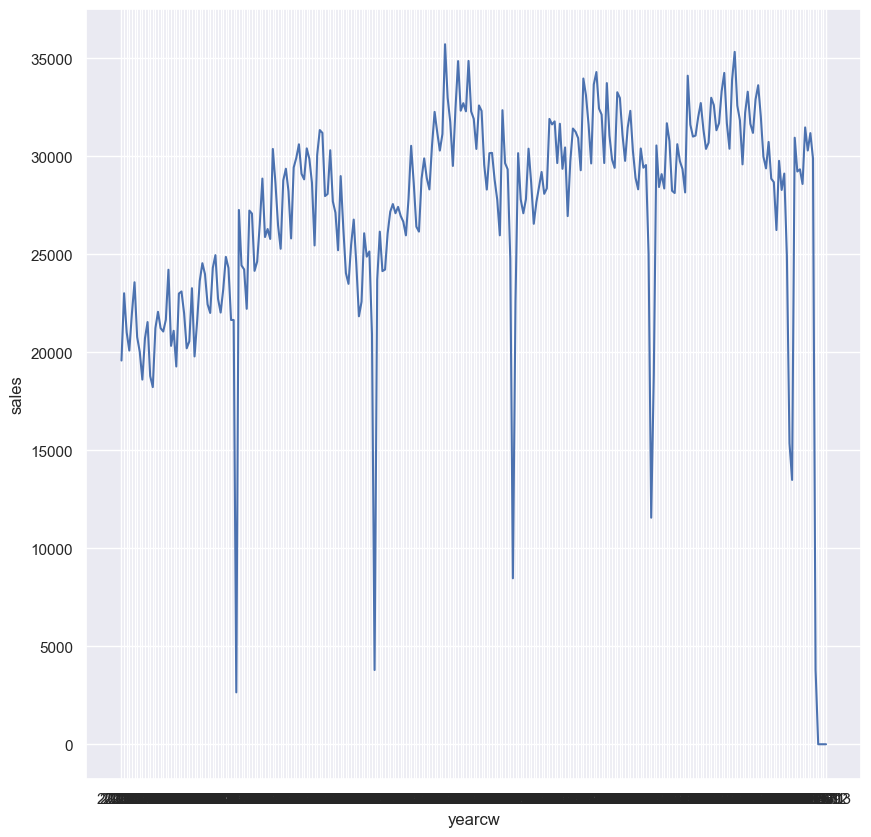

In [662]:
df_plot2 = df[['yearcw', 'sales', 'price']].groupby(by='yearcw').agg({'sales': 'sum', 'price': 'mean'})

sns.lineplot(x=df_plot2.index, y='sales', data=df_plot2)

In [663]:
df[df['yearcw']=='201352']

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw
3155715,2013-12-30,11349,NaN,NaN,NaN,NaN,0,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,8.26,201352
3155716,2013-12-30,11349,NaN,NaN,NaN,NaN,0,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,3.97,201352
3155717,2013-12-30,11349,NaN,NaN,NaN,NaN,0,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201352
3155718,2013-12-30,11349,NaN,NaN,NaN,NaN,0,HOBBIES_1_004,HOBBIES_1,HOBBIES,1.0,4.64,201352
3155719,2013-12-30,11349,NaN,NaN,NaN,NaN,0,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,3.08,201352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161808,2013-12-31,11349,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,2.0,2.50,201352
3161809,2013-12-31,11349,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,0.0,2.68,201352
3161810,2013-12-31,11349,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,0.0,3.98,201352
3161811,2013-12-31,11349,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,0.0,1.28,201352


In [664]:
df_plot2.iloc[145:155]

,sales,price
yearcw,,
201347,25970.0,4.395055
201348,32355.0,4.394091
201349,29655.0,4.394340
201350,29338.0,4.393391
201351,24772.0,4.391828
201352,8469.0,4.388859
201400,22585.0,4.391800
201401,30163.0,4.398940
201402,27802.0,4.407356


Die letzte Jahreswoche hat nach dieser Zählung zB 2013 nur 2 Tage, da die Kalenderwochenzählung am 01.01. wieder bei 1 beginnt, daher sind die Sales in der letzten Woche so niedrig

## 5 Erstellung der DataFrames
Im Folgenden werden verschiedene DataFrames unterschiedlicher Komplexitätsstufen mit verschiedenen Features erstellt um sie anschließend in verschiedenen Modellen zu nutzen.

### 5.1 Master Data Frame

DataFrame mit allen bereitgestellten Daten, Ergänzung um einzelne Datumsfeatures und Korrigierung der Datentypen

In [665]:
#Tag, Monat, Jahr, Wochentag, Woche im Jahr, Tag im Monat aus dem Datum extrahieren
df['dayofweek'] = df['date'].dt.dayofweek.astype('int')
df['month'] = df['date'].dt.month.astype('int')
df['weekofyear'] = df['date'].dt.weekofyear.astype('int')
df['dayofmonth'] = df['date'].dt.day.astype('int')

In [666]:
df.dtypes

date            datetime64[ns]
week_id                  int64
event_name_1            object
event_type_1            object
event_name_2            object
event_type_2            object
snap                     int64
item_id                 object
dept_id                 object
cat_id                  object
sales                  float64
price                  float64
yearcw                  object
dayofweek                int32
month                    int32
weekofyear               int32
dayofmonth               int32
dtype: object

In [667]:
# Datum in den Index setzen und sortieren
df.set_index('date', inplace = True)
df.sort_index(axis = 0, ascending = True, inplace = True)
df

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth
date,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31
2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31
2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31


### 5.2 Data Frame Sales für Benchmark Modell

In [668]:
df_sales = df['sales'].groupby(by='date').sum()
df_sales

date
2011-03-01    2549.0
2011-03-02    2559.0
2011-03-03    2568.0
2011-03-04    2978.0
2011-03-05    4096.0
               ...  
2016-03-27       0.0
2016-03-28       0.0
2016-03-29       0.0
2016-03-30       0.0
2016-03-31       0.0
Name: sales, Length: 1858, dtype: float64

### 5.3 Data Frame Medium

Der DataFrame Medium soll als DF mit wenigen aber aussagekräftigen simplen Features dienen.

Erstellung eines Features welches je Tag ausgibt ob es sich um einen keinen Feiertag oder welche Art von Feiertag es sich handelt. 

In [669]:
df.event_type_1 = pd.Categorical(df.event_type_1)
df.dtypes

week_id            int64
event_name_1      object
event_type_1    category
event_name_2      object
event_type_2      object
snap               int64
item_id           object
dept_id           object
cat_id            object
sales            float64
price            float64
yearcw            object
dayofweek          int32
month              int32
weekofyear         int32
dayofmonth         int32
dtype: object

In [670]:
df['event_code'] = df.event_type_1.cat.codes #Kodierung der Feiertagskategorien in Zahlen
df['event_type_1'].unique() 

[NaN, 'Religious', 'Cultural', 'National', 'Sporting']
Categories (4, object): ['Cultural', 'National', 'Religious', 'Sporting']

In [671]:
df['event_code'].unique() #Ausgabe der Kodierung

array([-1,  2,  0,  1,  3], dtype=int8)

Feiertagskodierung: </p>
Kein Feiertag = -1 ; Religious = 2 ; Cultural = 0 ; National = 1 ; Sporting = 3 

In [672]:
df.dtypes

week_id            int64
event_name_1      object
event_type_1    category
event_name_2      object
event_type_2      object
snap               int64
item_id           object
dept_id           object
cat_id            object
sales            float64
price            float64
yearcw            object
dayofweek          int32
month              int32
weekofyear         int32
dayofmonth         int32
event_code          int8
dtype: object

In [673]:
df[['event_code']] = df[['event_code']].astype('int') #Feiertagskodierung zum gruppieren in Integer umwandeln

In [674]:
df_medium = df[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'}) #Daten nach Datum aggregieren
df_medium[['dayofweek','month','event_code','snap']] = df_medium[['dayofweek','month','event_code','snap']].astype('category') #Kategorische Variablen wieder zurück in Kategorien umwandeln

In [675]:
#DataFrame zeitlich aufteilen
df_medium_past = df_medium[df_medium.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_medium_future = df_medium[df_medium.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_medium_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_medium = df_medium_past.drop(columns='sales') 
y_medium = df_medium_past['sales']

In [676]:
df_medium

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,2549.0,1.0,3.0,4.167098,-1.0,1.0
2011-03-02,2559.0,2.0,3.0,4.167098,-1.0,1.0
2011-03-03,2568.0,3.0,3.0,4.167098,-1.0,1.0
2011-03-04,2978.0,4.0,3.0,4.167098,-1.0,1.0
2011-03-05,4096.0,5.0,3.0,4.157467,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0.0,0.0
2016-03-28,0.0,0.0,3.0,4.489718,-1.0,0.0
2016-03-29,0.0,1.0,3.0,4.489718,-1.0,0.0


<AxesSubplot:xlabel='event_code', ylabel='sales'>

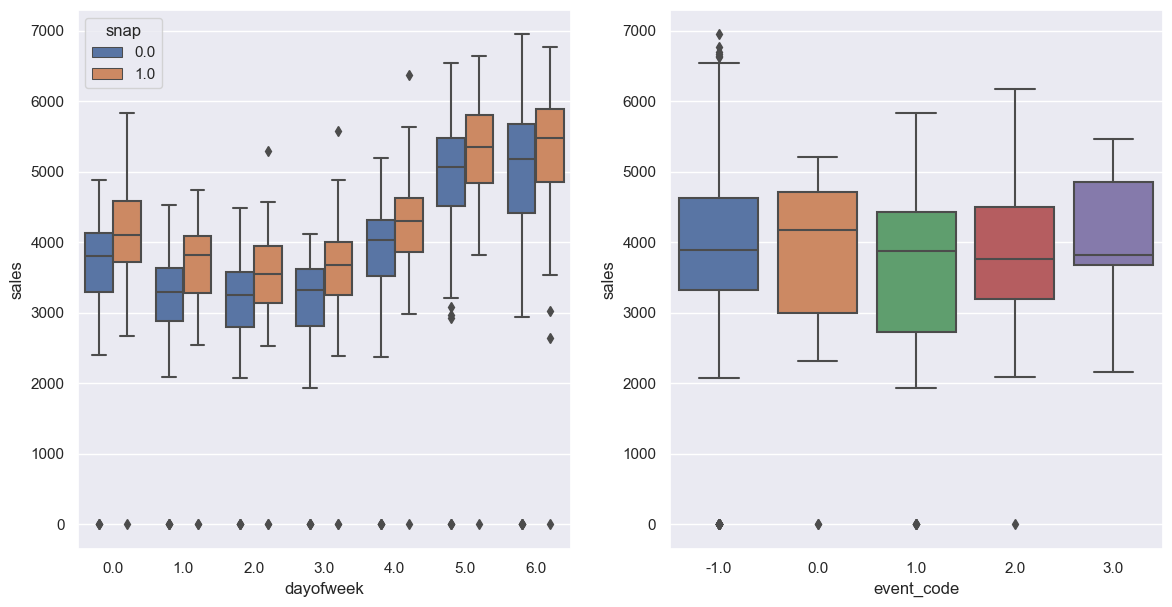

In [677]:
rows, cols = 1, 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))
axs = axs.flatten()


sns.boxplot(x = 'dayofweek', y = "sales", hue = 'snap', data = df_medium, ax = axs[0])
sns.boxplot(x = 'event_code', y = "sales", data = df_medium, ax = axs[1])


NaN = -1 ; Religious = 2 ; Cultural = 0 ; National = 1 ; Sporting = 3 

### 5.4 Data Frame Complex

Der Data Frame Complex nutzt die selben Features wie der Data Frame Medium, soll die Prognose jedoch für alle 3 Produktkategorien (Hobbies, Foods, Household) einzeln durchführen und am Ende aggregieren.
Dazu wird je ein Data Frame je Produktkategorie erstellt.

In [678]:
df['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

Data Frame Hobbies

In [679]:
df_hobbies = df[df['cat_id']=='HOBBIES']
df_hobbies

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,0,HOBBIES_2_145,HOBBIES_2,HOBBIES,NaN,2.88,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,0,HOBBIES_2_146,HOBBIES_2,HOBBIES,NaN,1.97,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,0,HOBBIES_2_147,HOBBIES_2,HOBBIES,NaN,0.97,201613,3,3,13,31,-1


In [680]:
#Auswahl derselben Features wie DF Medium und Aggregation nach Datum
df_hobbies = df_hobbies[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_hobbies.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_hobbies[['dayofweek','month','event_code','snap']] = df_hobbies[['dayofweek','month','event_code','snap']].astype('category')
df_hobbies

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,230.0,1.0,3.0,4.434672,-1.0,1.0
2011-03-02,197.0,2.0,3.0,4.434672,-1.0,1.0
2011-03-03,168.0,3.0,3.0,4.434672,-1.0,1.0
2011-03-04,193.0,4.0,3.0,4.434672,-1.0,1.0
2011-03-05,300.0,5.0,3.0,4.425600,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,5.571487,0.0,0.0
2016-03-28,0.0,0.0,3.0,5.571487,-1.0,0.0
2016-03-29,0.0,1.0,3.0,5.571487,-1.0,0.0


In [681]:
#DataFrame zeitlich aufteilen
df_hobbies_past = df_hobbies[df_hobbies.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_hobbies_future = df_hobbies[df_hobbies.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_hobbies_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_hobbies = df_hobbies_past.drop(columns='sales')
y_hobbies = df_hobbies_past['sales']

Data Frame Household

In [682]:
df_household = df[df['cat_id']=='HOUSEHOLD']
df_household

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,0.0,6.32,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,0.0,6.32,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOUSEHOLD_1_003,HOUSEHOLD_1,HOUSEHOLD,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOUSEHOLD_1_004,HOUSEHOLD_1,HOUSEHOLD,0.0,1.98,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOUSEHOLD_1_005,HOUSEHOLD_1,HOUSEHOLD,0.0,10.72,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,0,HOUSEHOLD_2_512,HOUSEHOLD_2,HOUSEHOLD,NaN,3.97,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,0,HOUSEHOLD_2_513,HOUSEHOLD_2,HOUSEHOLD,NaN,2.78,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,0,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,NaN,19.54,201613,3,3,13,31,-1


In [683]:
#Auswahl derselben Features wie DF Medium und Aggregation nach Datum
df_household = df_household[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_household.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_household[['dayofweek','month','event_code','snap']] = df_household[['dayofweek','month','event_code','snap']].astype('category')
df_household

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,423.0,1.0,3.0,5.566356,-1.0,1.0
2011-03-02,397.0,2.0,3.0,5.566356,-1.0,1.0
2011-03-03,416.0,3.0,3.0,5.566356,-1.0,1.0
2011-03-04,416.0,4.0,3.0,5.566356,-1.0,1.0
2011-03-05,573.0,5.0,3.0,5.571455,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,5.477316,0.0,0.0
2016-03-28,0.0,0.0,3.0,5.477316,-1.0,0.0
2016-03-29,0.0,1.0,3.0,5.477316,-1.0,0.0


In [684]:
#DataFrame zeitlich aufteilen
df_household_past = df_household[df_household.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_household_future = df_household[df_household.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_household_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_household = df_household_past.drop(columns='sales')
y_household = df_household_past['sales']

Data Frame Foods

In [685]:
df_foods = df[df['cat_id']=='FOODS']
df_foods

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,1,FOODS_1_001,FOODS_1,FOODS,2.0,2.00,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,FOODS_1_002,FOODS_1,FOODS,1.0,7.88,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,FOODS_1_003,FOODS_1,FOODS,0.0,2.88,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,FOODS_1_004,FOODS_1,FOODS,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,1,FOODS_1_005,FOODS_1,FOODS,0.0,2.94,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31,-1


In [686]:
#Auswahl derselben Features wie DF Medium und Aggregation nach Datum
df_foods = df_foods[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_foods.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_foods[['dayofweek','month','event_code','snap']] = df_foods[['dayofweek','month','event_code','snap']].astype('category')
df_foods

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,1896.0,1.0,3.0,3.125868,-1.0,1.0
2011-03-02,1965.0,2.0,3.0,3.125868,-1.0,1.0
2011-03-03,1984.0,3.0,3.0,3.125868,-1.0,1.0
2011-03-04,2369.0,4.0,3.0,3.125868,-1.0,1.0
2011-03-05,3223.0,5.0,3.0,3.111022,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,3.344823,0.0,0.0
2016-03-28,0.0,0.0,3.0,3.344823,-1.0,0.0
2016-03-29,0.0,1.0,3.0,3.344823,-1.0,0.0


In [687]:
#DataFrame zeitlich aufteilen
df_foods_past = df_foods[df_foods.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_foods_future = df_foods[df_foods.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_foods_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_foods = df_foods_past.drop(columns='sales')
y_foods = df_foods_past['sales']

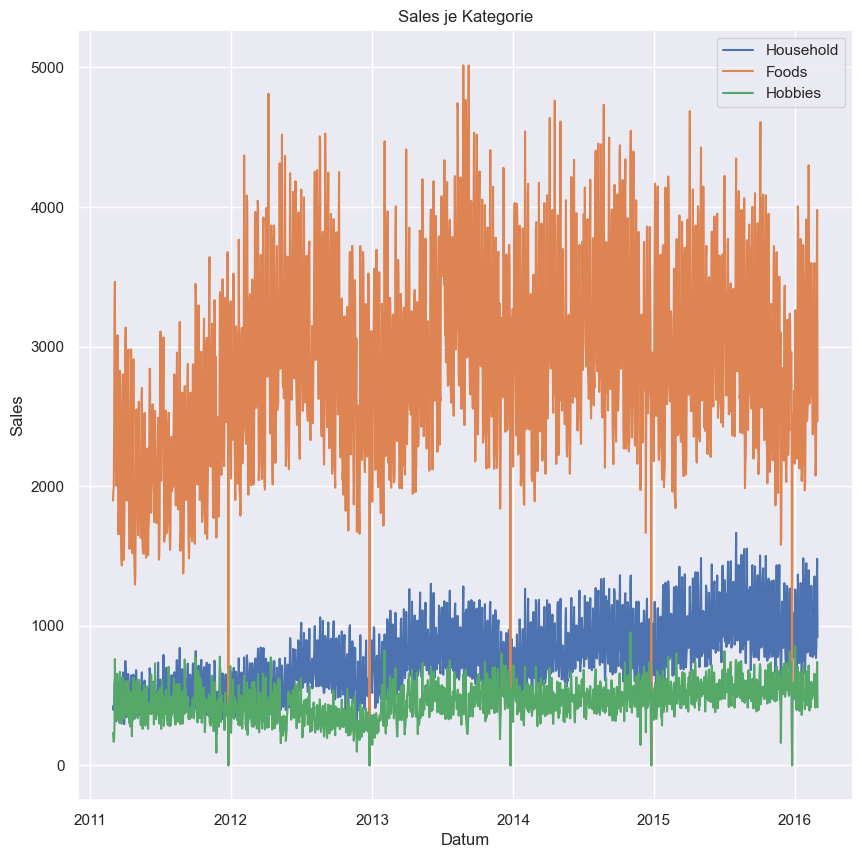

In [688]:
plt.plot(df_household_past.index,df_household_past['sales'],label="Household")
plt.plot(df_foods_past.index,df_foods_past['sales'],label="Foods")
plt.plot(df_hobbies_past.index,df_hobbies_past['sales'],label="Hobbies")
plt.title('Sales je Kategorie')
plt.xlabel("Datum")
plt.ylabel("Sales")
plt.legend(loc='upper right')
plt.show()


### 5.5 Data Frame Categories

Der Data Frame Categories nutzt die selben Features wie der Data Frame Medium, soll die Prognose jedoch für alle 3 Departmentkategorien (HOBBIES_1, HOBBIES_2, HOUSEHOLD_1, HOUSEHOLD_2, FOODS_1,
       FOODS_2, FOODS_3) einzeln durchführen und am Ende aggregieren. </p>
Dazu wird ein Data Frame erstellt der nach Datum und Deparmentkategorie aggregiert ist. 

In [689]:
df['dept_id'].nunique()

7

In [690]:
df_categories = df.copy() #Kopie des Master Data Frames erstellen
df_categories = df_categories.groupby(['date','dept_id'])['event_code','snap','sales','price','dayofweek','month'].agg(
    {   'event_code': 'first',
        'snap': 'first',
        'sales': 'sum',
        'price': 'mean',
        'dayofweek': 'first',
        'month': 'first'}) #Aggregation nach Datum und Departmentkategorie

In [691]:
df_categories

event_code  snap   sales     price  dayofweek  month
date       dept_id                                                          
2011-03-01 FOODS_1              -1     1   276.0  2.968496          1      3
           FOODS_2              -1     1   401.0  3.868844          1      3
           FOODS_3              -1     1  1219.0  2.788026          1      3
           HOBBIES_1            -1     1   217.0  4.961522          1      3
           HOBBIES_2            -1     1    13.0  2.819000          1      3
...                            ...   ...     ...       ...        ...    ...
2016-03-31 FOODS_3              -1     0     0.0  2.923621          3      3
           HOBBIES_1            -1     0     0.0  6.644423          3      3
           HOBBIES_2            -1     0     0.0  2.575906          3      3
           HOUSEHOLD_1          -1     0     0.0  5.187519          3      3
           HOUSEHOLD_2          -1     0     0.0  5.776680          3      3

[13006 rows x 6 columns]

In [692]:
df_categories.dtypes

event_code      int32
snap            int64
sales         float64
price         float64
dayofweek       int32
month           int32
dtype: object

In [693]:
#Nur das Datum in den Index setzen
df_categories.reset_index(inplace=True)
df_categories.set_index('date', inplace=True)

In [694]:
#Datentypen anpassen
df_categories['dept_id'] = df_categories['dept_id'].astype('category')
df_categories['snap'] = df_categories['snap'].astype('int')

In [695]:
from sklearn.preprocessing import OrdinalEncoder

#Departmentkategorien numerisch codieren
enc = OrdinalEncoder()
enc.fit(df_categories[["dept_id"]])
df_categories[["dept_id"]] = enc.transform(df_categories[["dept_id"]])

In [696]:
#DataFrame zeitlich aufteilen
df_categories_past = df_categories[df_categories.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_categories_future = df_categories[df_categories.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_categories_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_categories = df_categories_past.drop(columns='sales')
y_categories = df_categories_past['sales']

### 5.6 Data Frame All

Der Data Frame All soll eine Vielzahl von Features enthalten von denen später die besten Features durch einen Feature Selection Algorithmus ausgewählt werden.

In [697]:
df_all = df.copy() #Kopie des Master Data Frames erstellen
df_all = df[['week_id','yearcw','dayofmonth','weekofyear','dayofweek','month','sales','price','event_code','snap']].groupby(by=df.index).agg(
    {'sales':'sum','dayofweek':'mean','month':'mean','weekofyear':'mean','yearcw':'first', 'price':'mean','event_code':'mean','snap':'mean','dayofmonth':'mean'}
    ) #Aggregation nach Datum

In [698]:
df_all

,sales,dayofweek,month,weekofyear,yearcw,price,event_code,snap,dayofmonth
date,,,,,,,,,
2011-03-01,2549.0,1.0,3.0,9.0,201109,4.167098,-1.0,1.0,1.0
2011-03-02,2559.0,2.0,3.0,9.0,201109,4.167098,-1.0,1.0,2.0
2011-03-03,2568.0,3.0,3.0,9.0,201109,4.167098,-1.0,1.0,3.0
2011-03-04,2978.0,4.0,3.0,9.0,201109,4.167098,-1.0,1.0,4.0
2011-03-05,4096.0,5.0,3.0,9.0,201109,4.157467,-1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,201612,4.489718,0.0,0.0,27.0
2016-03-28,0.0,0.0,3.0,13.0,201613,4.489718,-1.0,0.0,28.0
2016-03-29,0.0,1.0,3.0,13.0,201613,4.489718,-1.0,0.0,29.0


In [699]:
#Einfügen / Erstellen / Anpassen von Features
df_all['event_code'] = df_all['event_code'].astype('int') #Datentyp anpassen
df_all['price_change_day'] = df_all['price'].diff() #Preisänderung pro Tag
df_all['price_change_week'] = df_all['price'].diff(periods=7) #Preisänderung pro Woche
df_all['snap_since'] = df_all.groupby((df_all['snap'] == 1).cumsum()).cumcount() #Anzahl der Tage seit dem letzten SNAP Tag
df_all['snap_until'] = df_all.groupby((df_all['snap'] == 1).cumsum()).cumcount(ascending=False) #Anzahl der Tage bis zum nächsten SNAP Tag
df_all['snap_first_or_last_day'] = df_all['snap'].diff() #Erster oder letzter SNAP Tag
df_all[['price_change_day','price_change_week']] = df_all[['price_change_day','price_change_week']].fillna(0) #NaN Werte mit 0 ersetzen
df_all['sales_last_month_same_day'] = df_all['sales'].shift(35) #Sales des Vormonats am gleichen Tag (35 Tage da dies ermöglicht die Variable über den Prognosezeitraum (30 Tage) zu definieren ohne prognostizieren zu müssen)
#df_all['avg_sales_last_31_days'] = df_all['sales'].rolling(min_periods=1,window=31).mean() #Durchschnitt der Sales der letzten 31 Tage
df_all['days_since_last_holiday'] = df_all.groupby((df_all['event_code'] >= 0).cumsum()).cumcount() #Anzahl der Tage seit dem letzten Feiertag
df_all['days_until_next_holiday'] = df_all.groupby((df_all['event_code'] >= 0).cumsum()).cumcount(ascending=False) #Anzahl der Tage bis zum nächsten Feiertag
#df_all = df_all.drop(columns='event_code')
df_all = df_all.iloc[35:,:] #Abschneiden der ersten 35 Zeilen, da diese für das Feature Sales_last_month_same_day = 0 sind.
df_all

,sales,dayofweek,month,weekofyear,yearcw,price,event_code,snap,dayofmonth,price_change_day,price_change_week,snap_since,snap_until,snap_first_or_last_day,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday
date,,,,,,,,,,,,,,,,,
2011-04-05,2784.0,1.0,4.0,14.0,201114,4.201332,-1,1.0,5.0,0.000000,0.008721,0,0,0.0,2549.0,16,18
2011-04-06,2602.0,2.0,4.0,14.0,201114,4.201332,-1,1.0,6.0,0.000000,0.008721,0,0,0.0,2559.0,17,17
2011-04-07,2976.0,3.0,4.0,14.0,201114,4.201332,-1,1.0,7.0,0.000000,0.008721,0,0,0.0,2568.0,18,16
2011-04-08,3294.0,4.0,4.0,14.0,201114,4.201332,-1,1.0,8.0,0.000000,0.008721,0,0,0.0,2978.0,19,15
2011-04-09,4083.0,5.0,4.0,14.0,201114,4.205870,-1,1.0,9.0,0.004538,0.004538,0,0,0.0,4096.0,20,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,201612,4.489718,0,0.0,27.0,0.000000,-0.000410,17,4,0.0,5607.0,0,4
2016-03-28,0.0,0.0,3.0,13.0,201613,4.489718,-1,0.0,28.0,0.000000,-0.000410,18,3,0.0,3905.0,1,3
2016-03-29,0.0,1.0,3.0,13.0,201613,4.489718,-1,0.0,29.0,0.000000,-0.000410,19,2,0.0,3613.0,2,2


In [700]:
#DataFrame zeitlich aufteilen
df_all_past = df_all[df_all.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_all_future = df_all[df_all.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_all_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_all = df_all_past.drop(columns='sales')
y_all = df_all_past['sales']

## 6 Modellbildung

Im nächsten Kapitel werden verschiedene Modelle gebaut und unter Verwendung der verschiedenen DataFrames getestet.

### 6.1 Benchmark Modell Exponential Smoothing

In [701]:
#DataFrame zeitlich aufteilen
df_sales_future = df_sales[df_sales.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_sales_past = df_sales[df_sales.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung


In [702]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

train, test = temporal_train_test_split(df_sales_past, test_size = 31) #Train Test Split mit 31 Tagen Testdaten
fh = ForecastingHorizon(test.index, is_relative = False) #Forecasting Horizon definieren (Letzte 31 Tage)

#Frequenz der Daten für Forecasting Horizon auf Tagesbasis setzen
train.index.freq = 'D' 
test.index.freq = 'D'

exps = ExponentialSmoothing(
    seasonal='add',
    sp= 7,
    trend='add',
    damped_trend=True,
)

exps.fit(train)
preds = exps.predict(fh) #Vorhersage der Testdaten
print('MAE:\t %4.2f' % (MAE(y_true = test, y_pred = preds))) #Mean Absolute Error als Vergleichsgröße berechnen und ausgeben

MAE:	 434.83


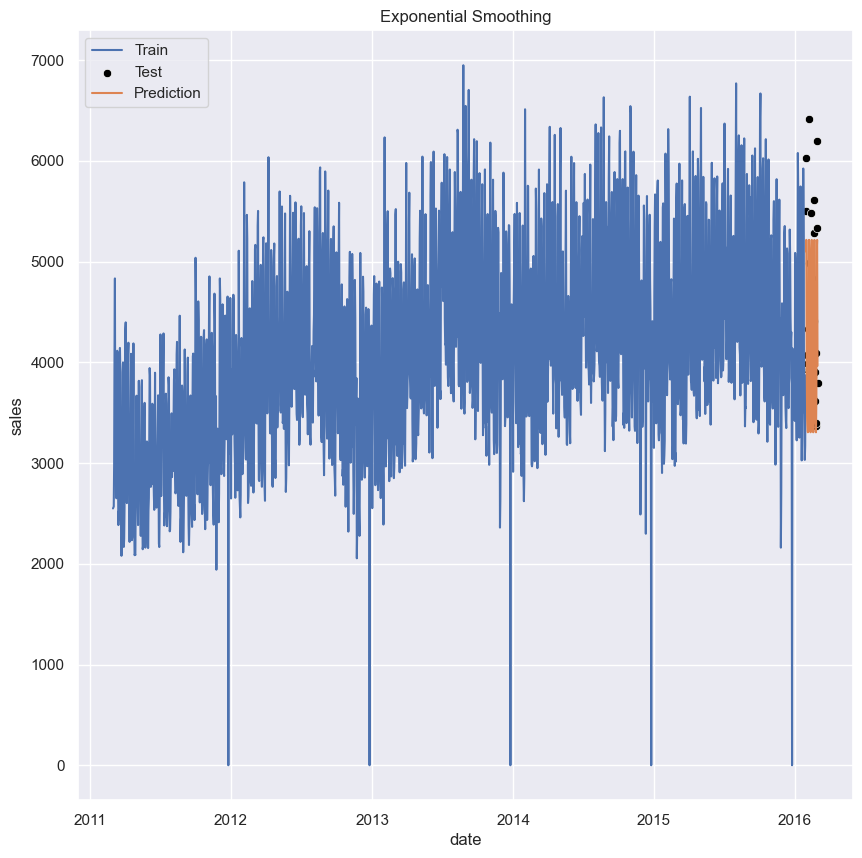

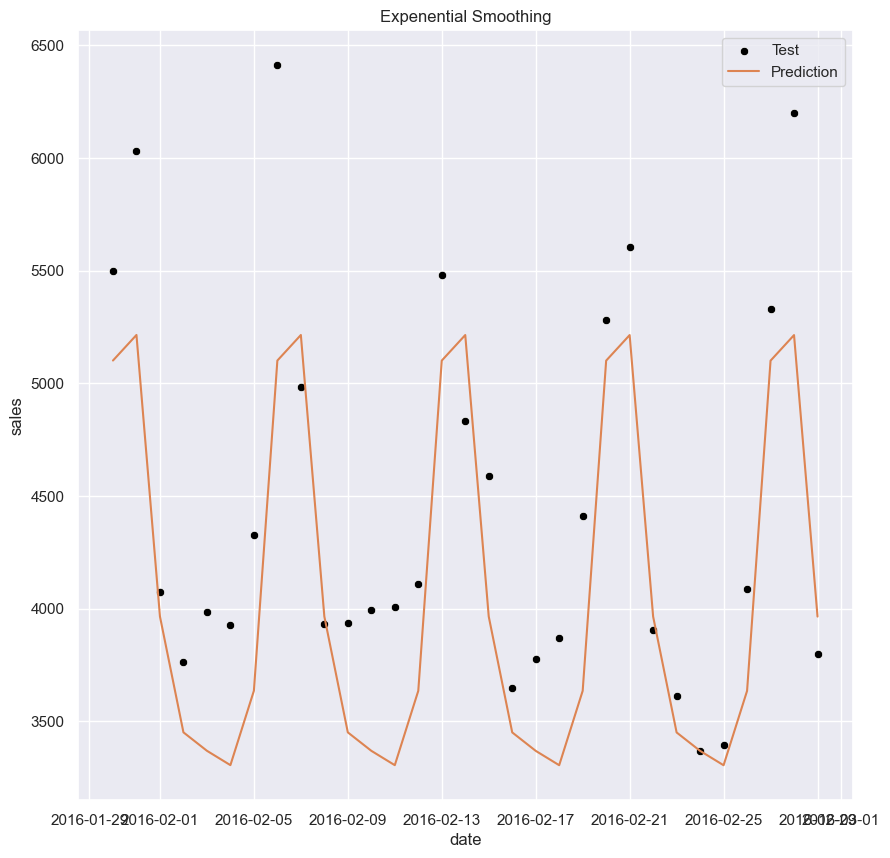

In [703]:
#Plot der Vorhersage gegenüber den tatsächlichen Werten auf Gesamtzeitraum
sns.lineplot(data = train, label = 'Train')
sns.scatterplot(data = test, color = 'black', label = 'Test')
sns.lineplot(data = preds, label = 'Prediction')
plt.title('Exponential Smoothing')
plt.show()

#Plot der Vorhersage gegenüber den tatsächlichen Werten auf Evaluationszeitraum
sns.scatterplot(data = test, color = 'black', label = 'Test')
sns.lineplot(data = preds, color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Expenential Smoothing')
plt.show()

In [704]:
#Schlussendliche Prognose des Evaluationszeitraums (01.03.2016 - 31.03.2016)
forecast_exponential_smoothing = exps.fit(df_sales_past) #Fit des Modells auf den gesamten Datensatz
df_sales_future.index.freq = 'D' #Frequenz der Daten für Forecasting Horizon auf Tagesbasis setzen
fh = ForecastingHorizon(df_sales_future.index, is_relative = False) #Forecasting Horizon definieren (01.03.2016 - 31.03.2016)

#Vorhersage des Evaluationszeitraums und Umwandlung in das Abgabeformat.
prediction_exponential_smoothing = pd.Series(data = forecast_exponential_smoothing.predict(fh), index = pd.date_range(start = fh.min(), end = fh.max()))
prediction_exponential_smoothing.index.name = 'Date'
prediction_exponential_smoothing.name = 'sales'

#Als .csv Datei abspeichern
prediction_exponential_smoothing.to_csv('exponential_smoothing.csv')

### 6.2 Random Forest Regressor (Medium DF)

In [705]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE


rf_medium = RandomForestRegressor(n_estimators=1000,criterion='squared_error', max_depth= 8,max_features='log2',max_leaf_nodes = 650,random_state=42, min_samples_split = 9) #Hyperparameter im ersten Schritt manuell angepasst 
x_train, x_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=31, shuffle = False) #Train Test Split mit 31 Tagen Testdaten
rf_medium.fit(x_train, y_train)


preds = rf_medium.predict(x_test) #Vorhersage der Testdaten
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds))) #Mean Absolute Error als Vergleichsgröße berechnen und ausgeben

MAE:	 226.82


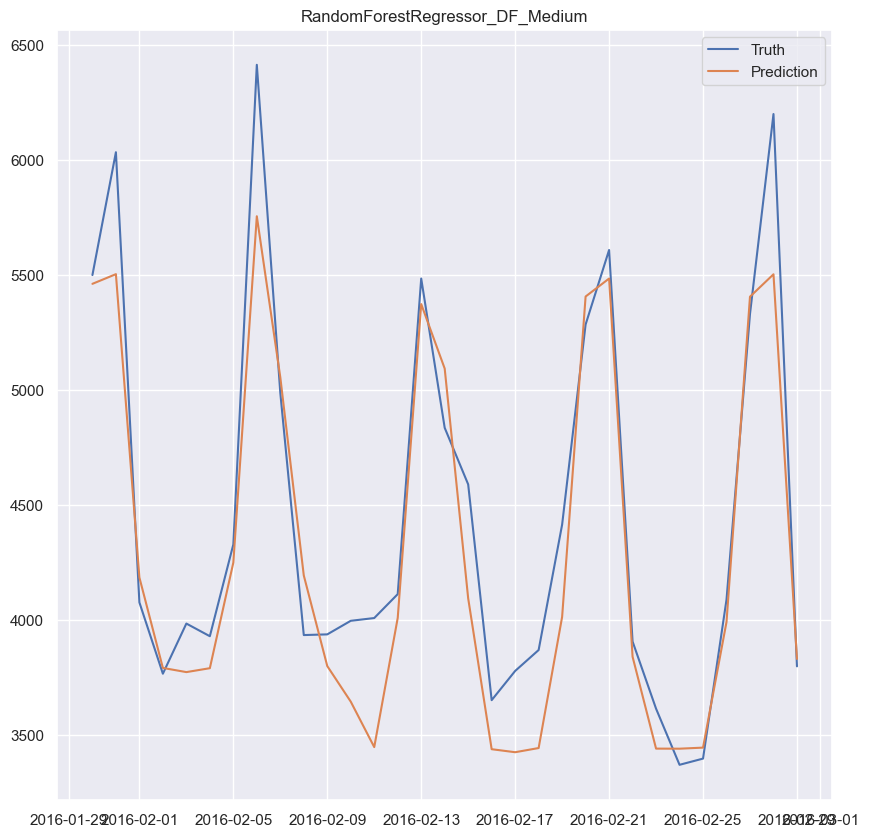

In [706]:
#Plot der Vorhersage gegenüber den tatsächlichen Werten
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor_DF_Medium')
plt.legend(['Truth','Prediction'])

Hier Hyperparameteroptimierung einfügen

In [707]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

#Kreuuvalidierung mit TimeSeriesSplit, 5 Folds, 31 Tage Testdaten, 0 Tage Überschneidung
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_medium

#Vergleichsgröße MAE und MAE MAD berechnen
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_medium,
        y=y_medium,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

#MAE mean und MAE MAD als Vergleichsgröße ausgeben
print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 321.87
MAE mad:	 79.69


In [708]:
#Schlussendliche Prognose des Evaluationszeitraums (01.03.2016 - 31.03.2016)
forecast_rf_medium_alldata = rf_medium.fit(X_medium, y_medium) #Fit des Modells auf den gesamten Datensatz

#Vorhersage des Evaluationszeitraums und Umwandlung in das Abgabeformat.
prediction_rf_medium_alldata = pd.Series(data = forecast_rf_medium_alldata.predict(df_medium_future), index = pd.date_range(start = df_medium_future.index.min(), end = df_medium_future.index.max()))
prediction_rf_medium_alldata.index.name = 'Date'
prediction_rf_medium_alldata.name = 'sales'

#Als .csv Datei abspeichern
prediction_rf_medium_alldata.to_csv('rf_medium_alldata.csv')

### 6.3 Random Forest Regressor (Medium DF + shifted Sales)

Im nächsten Schritt ergänzen wir den DF Medium um die Sales des Vortages und der Sales am selben Tag in der Vorwoche. Da diese für den Evaluationszeitraum nicht vorhanden sind nutzen wir für diesen Zeitraum die prognostizierten Werte des Random Forest Regressors (Medium DF), da dieser ein gutes Ergebnis liefert.

In [709]:
df_medium_sales_shift = df_medium.copy()
df_medium_sales_shift['sales_yesterday'] = df_medium_sales_shift['sales'].shift(1) #Einsetzen des Sales Wertes vom Vortag in das Feature sales_yesterday
for i in range(0,30,1):
    df_medium_sales_shift.at[df_medium_sales_shift.iloc[len(df_medium_sales_shift)-(30-i)].name,'sales_yesterday'] = prediction_rf_medium_alldata.iloc[i] #Einsetzen der Prognosewerte für die letzten 30 Tage in das Feature sales_yesterday
df_medium_sales_shift['sales_last_week_same_day'] = df_medium_sales_shift['sales_yesterday'].shift(6) #Einsetzen des Sales Wertes der letzten Woche am gleichen Tag in das Feature sales_last_week_same_day
df_medium_sales_shift = df_medium_sales_shift.iloc[7:] #Abschneiden der ersten 7 Zeilen, da diese für das Feature sales_last_week_same_day = 0 sind.
df_medium_sales_shift

,sales,dayofweek,month,price,event_code,snap,sales_yesterday,sales_last_week_same_day
date,,,,,,,,
2011-03-08,2997.0,1.0,3.0,4.157467,-1.0,1.0,3138.000000,2549.000000
2011-03-09,2772.0,2.0,3.0,4.157467,2.0,1.0,2997.000000,2559.000000
2011-03-10,2650.0,3.0,3.0,4.157467,-1.0,1.0,2772.000000,2568.000000
2011-03-11,3249.0,4.0,3.0,4.157467,-1.0,0.0,2650.000000,2978.000000
2011-03-12,4114.0,5.0,3.0,4.186751,-1.0,0.0,3249.000000,4096.000000
...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0.0,0.0,5337.134313,5528.312938
2016-03-28,0.0,0.0,3.0,4.489718,-1.0,0.0,5010.507731,3861.483508
2016-03-29,0.0,1.0,3.0,4.489718,-1.0,0.0,3862.421734,3517.810191


In [710]:
#DataFrame zeitlich aufteilen
df_medium_sales_shift_past = df_medium_sales_shift[df_medium_sales_shift.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_medium_sales_shift_future = df_medium_sales_shift[df_medium_sales_shift.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_medium_sales_shift_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_medium_sales_shift = df_medium_sales_shift_past.drop(columns='sales')
y_medium_sales_shift = df_medium_sales_shift_past['sales']

In [711]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_medium_sales_shift = RandomForestRegressor(n_estimators=1000,criterion='squared_error', max_depth= 8,max_features='log2',max_leaf_nodes = 650,random_state=42, min_samples_split = 9) #Hyperparameter zunächst vom rf_medium Modell übernommen
x_train, x_test, y_train, y_test = train_test_split(X_medium_sales_shift, y_medium_sales_shift, test_size=31, shuffle = False) #Train Test Split mit 31 Tagen Testdaten
rf_medium_sales_shift.fit(x_train, y_train)

preds = rf_medium_sales_shift.predict(x_test) #Vorhersage der Testdaten
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds))) #Mean Absolute Error als Vergleichsgröße berechnen und ausgeben

MAE:	 233.47


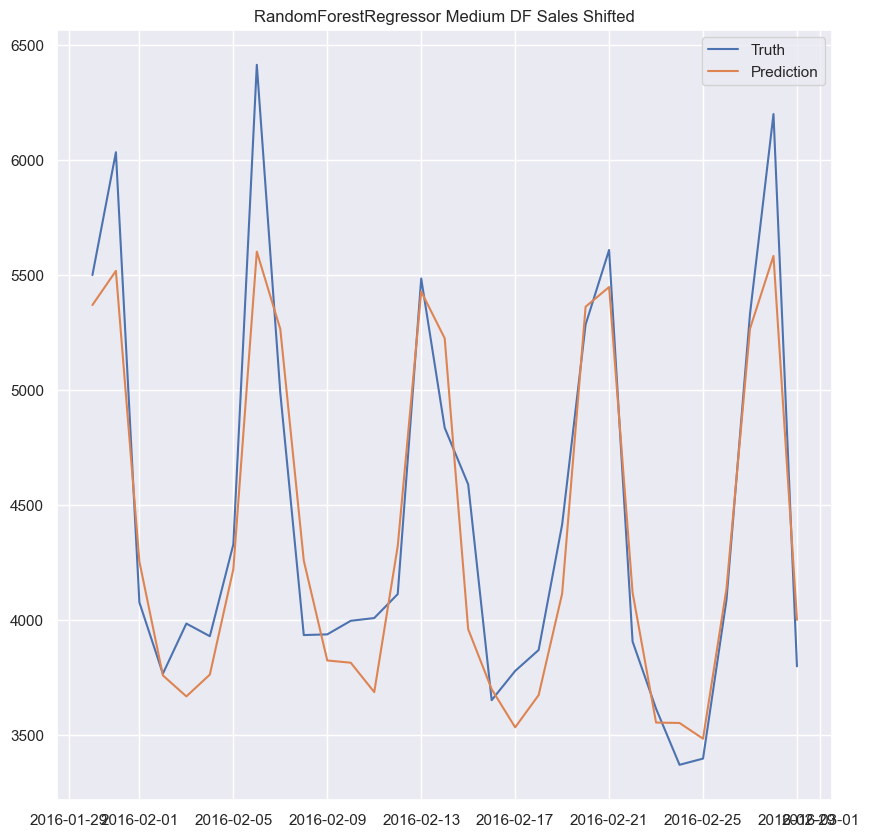

In [712]:
#Plot der Vorhersage gegenüber den tatsächlichen Werten
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor Medium DF Sales Shifted')
plt.legend(['Truth','Prediction'])

In [713]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

#Kreuuvalidierung mit TimeSeriesSplit, 5 Folds, 31 Tage Testdaten, 0 Tage Überschneidung
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_medium_sales_shift

#Vergleichsgröße MAE und MAE MAD berechnen
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_medium_sales_shift,
        y=y_medium_sales_shift,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

#MAE mean und MAE MAD als Vergleichsgröße ausgeben
print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


MAE mean:	 289.98
MAE mad:	 49.79


In [714]:
#Schlussendliche Prognose des Evaluationszeitraums (01.03.2016 - 31.03.2016)
forecast_rf_medium_sales_shift_alldata = rf_medium_sales_shift.fit(X_medium_sales_shift, y_medium_sales_shift) #Fit des Modells auf den gesamten Datensatz

#Vorhersage des Evaluationszeitraums und Umwandlung in das Abgabeformat.
forecast_rf_medium_sales_shift_alldata = pd.Series(data = forecast_rf_medium_sales_shift_alldata.predict(df_medium_sales_shift_future), index = pd.date_range(start = df_medium_sales_shift_future.index.min(), end = df_medium_sales_shift_future.index.max()))
forecast_rf_medium_sales_shift_alldata.index.name = 'Date'
forecast_rf_medium_sales_shift_alldata.name = 'sales'

#Als .csv Datei abspeichern
forecast_rf_medium_sales_shift_alldata.to_csv('rf_medium_sales_shift_alldata.csv')

### 6.4 Random Forest Regressor (DF Complex)

Im nächsten Schritt werden 3 Random Forest Regressoren für je eine Itemkategorie gebaut und die Ergebnisse aggregiert.

#### Foods

In [715]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_foods = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_foods, y_foods, test_size=31, shuffle = False) #Train Test Split mit 31 Tagen Testdaten
rf_foods.fit(x_train, y_train)


preds = rf_foods.predict(x_test) #Vorhersage der Testdaten
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds))) #Mean Absolute Error als Vergleichsgröße berechnen und ausgeben

MAE:	 239.75


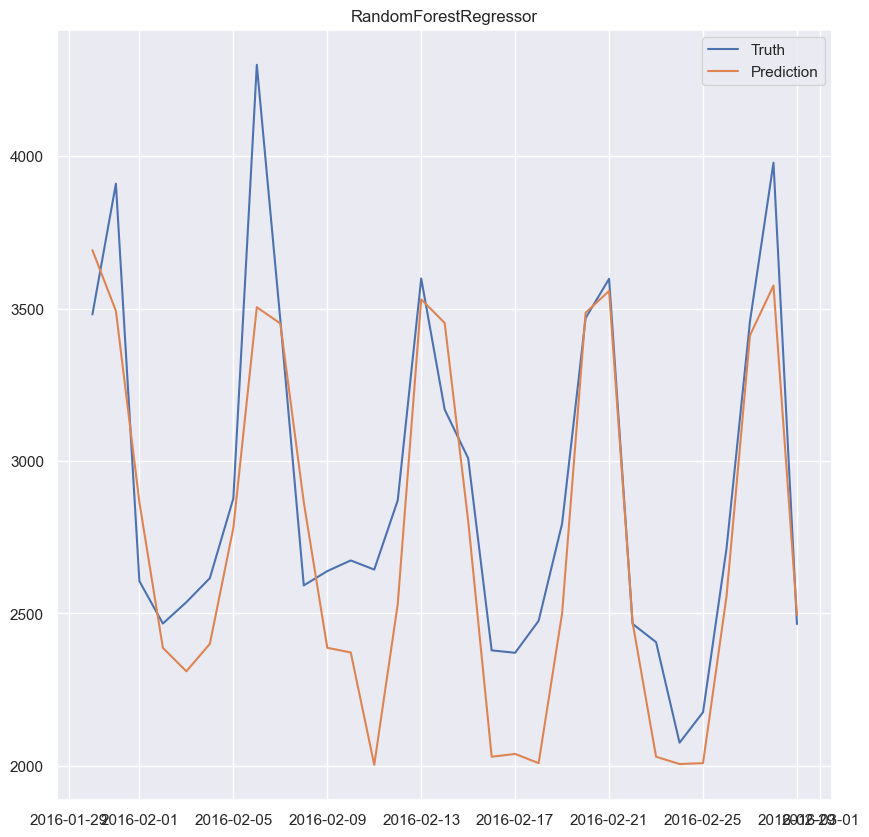

In [716]:
#Plot der Vorhersage gegenüber den tatsächlichen Werten
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [717]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

#Kreuuvalidierung mit TimeSeriesSplit, 5 Folds, 31 Tage Testdaten, 0 Tage Überschneidung
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_foods

#Vergleichsgröße MAE und MAE MAD berechnen
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_foods,
        y=y_foods,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

#MAE mean und MAE MAD als Vergleichsgröße ausgeben
print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 282.00
MAE mad:	 47.89


In [718]:
#Schlussendliche Prognose des Evaluationszeitraums (01.03.2016 - 31.03.2016)
forecast_rf_foods_alldata = rf_foods.fit(X_foods, y_foods)#Fit des Modells auf den gesamten Datensatz

#Vorhersage des Evaluationszeitraums und Umwandlung in das Abgabeformat.
prediction_rf_foods_alldata = pd.Series(data = forecast_rf_foods_alldata.predict(df_foods_future), index = pd.date_range(start = df_foods_future.index.min(), end = df_foods_future.index.max()))
prediction_rf_foods_alldata.index.name = 'Date'
prediction_rf_foods_alldata.name = 'sales'

prediction_rf_foods_alldata

Date
2016-03-01    2466.84
2016-03-02    2446.71
2016-03-03    2463.96
2016-03-04    2891.01
2016-03-05    3851.86
2016-03-06    3903.15
2016-03-07    2689.65
2016-03-08    2465.52
2016-03-09    2445.82
2016-03-10    2463.73
2016-03-11    2743.53
2016-03-12    3408.28
2016-03-13    3838.71
2016-03-14    2516.41
2016-03-15    2229.31
2016-03-16    2177.24
2016-03-17    2107.33
2016-03-18    2743.53
2016-03-19    3548.82
2016-03-20    3766.07
2016-03-21    2488.52
2016-03-22    2192.55
2016-03-23    2113.21
2016-03-24    2254.91
2016-03-25    2710.40
2016-03-26    3403.17
2016-03-27    3459.78
2016-03-28    2512.10
2016-03-29    2229.31
2016-03-30    2177.24
2016-03-31    2132.08
Freq: D, Name: sales, dtype: float64

#### Household

In [719]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_household = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_household, y_household, test_size=31, shuffle = False) #Train Test Split mit 31 Tagen Testdaten
rf_household.fit(x_train, y_train)

preds = rf_household.predict(x_test) #Vorhersage der Testdaten
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds))) #Mean Absolute Error als Vergleichsgröße berechnen und ausgeben

MAE:	 138.04


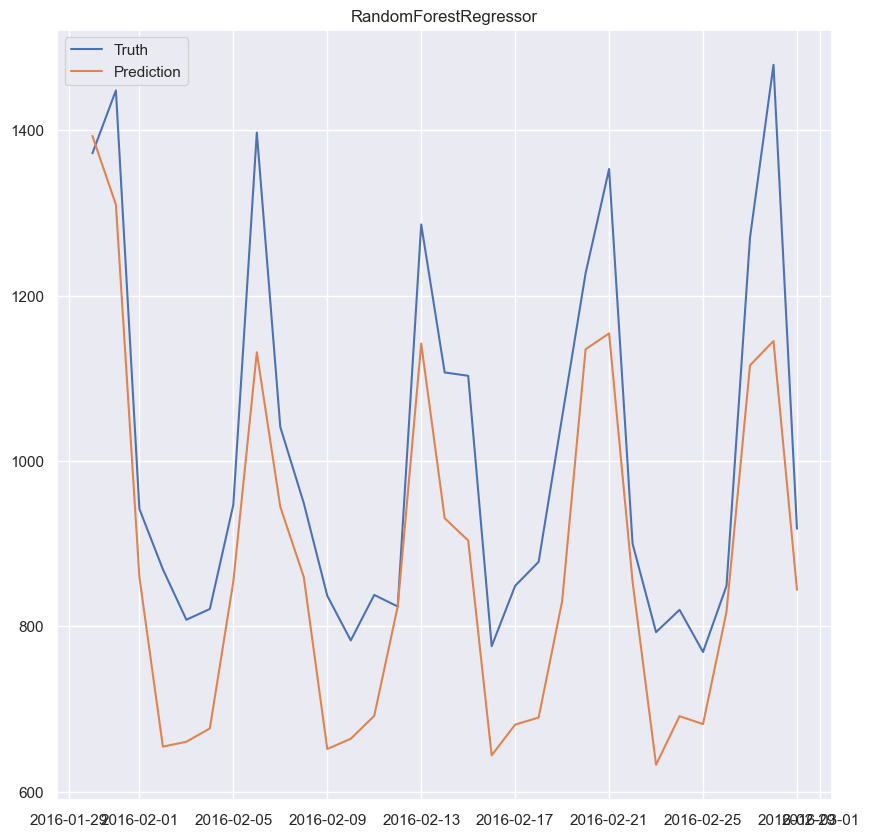

In [720]:
#Plot der Vorhersage gegenüber den tatsächlichen Werten
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [721]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

#Kreuuvalidierung mit TimeSeriesSplit, 5 Folds, 31 Tage Testdaten, 0 Tage Überschneidung
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_household

#Vergleichsgröße MAE und MAE MAD berechnen
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_household,
        y=y_household,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

#MAE mean und MAE MAD als Vergleichsgröße ausgeben
print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


MAE mean:	 132.87
MAE mad:	 25.22


In [722]:
#Schlussendliche Prognose des Evaluationszeitraums (01.03.2016 - 31.03.2016)
forecast_rf_household_alldata = rf_household.fit(X_household, y_household) #Fit des Modells auf den gesamten Datensatz

#Vorhersage des Evaluationszeitraums und Umwandlung in das Abgabeformat.
prediction_rf_household_alldata = pd.Series(data = forecast_rf_household_alldata.predict(df_household_future), index = pd.date_range(start = df_household_future.index.min(), end = df_household_future.index.max()))
prediction_rf_household_alldata.index.name = 'Date'
prediction_rf_household_alldata.name = 'sales'

prediction_rf_household_alldata

Date
2016-03-01     797.68
2016-03-02     800.23
2016-03-03     791.54
2016-03-04     866.64
2016-03-05    1220.22
2016-03-06    1313.16
2016-03-07     916.69
2016-03-08     728.68
2016-03-09     753.36
2016-03-10     748.30
2016-03-11     846.02
2016-03-12    1226.36
2016-03-13    1350.60
2016-03-14     896.33
2016-03-15     707.91
2016-03-16     750.63
2016-03-17     741.80
2016-03-18     838.78
2016-03-19    1226.36
2016-03-20    1350.60
2016-03-21     896.33
2016-03-22     707.91
2016-03-23     750.63
2016-03-24     744.63
2016-03-25     838.78
2016-03-26    1234.10
2016-03-27    1013.13
2016-03-28     898.92
2016-03-29     716.41
2016-03-30     760.80
2016-03-31     749.73
Freq: D, Name: sales, dtype: float64

#### Hobbies

In [723]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_hobbies = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_hobbies, y_hobbies, test_size=31, shuffle = False) #Train Test Split mit 31 Tagen Testdaten
rf_hobbies.fit(x_train, y_train)

preds = rf_hobbies.predict(x_test) #Vorhersage der Testdaten
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds))) #Mean Absolute Error als Vergleichsgröße berechnen und ausgeben

MAE:	 85.32


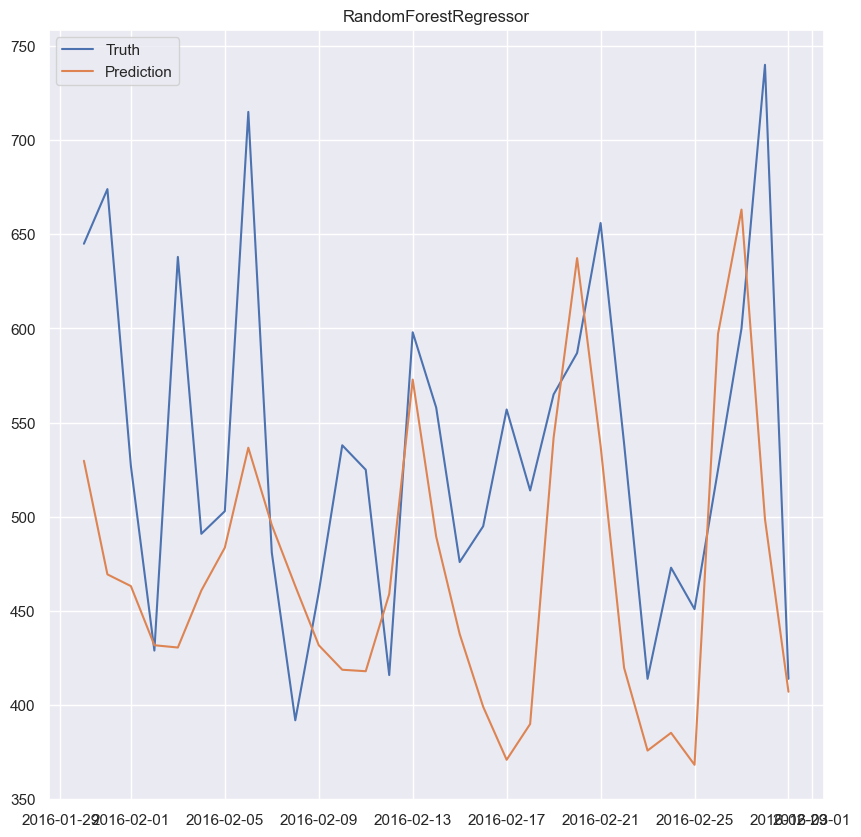

In [724]:
#Plot der Vorhersage gegenüber den tatsächlichen Werten
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])


In [725]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

#Kreuuvalidierung mit TimeSeriesSplit, 5 Folds, 31 Tage Testdaten, 0 Tage Überschneidung
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_hobbies

#Vergleichsgröße MAE und MAE MAD berechnen
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_hobbies,
        y=y_hobbies,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

#MAE mean und MAE MAD als Vergleichsgröße ausgeben
print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


MAE mean:	 73.57
MAE mad:	 11.92


In [726]:
#Schlussendliche Prognose des Evaluationszeitraums (01.03.2016 - 31.03.2016)
forecast_rf_hobbies_alldata = rf_hobbies.fit(X_hobbies, y_hobbies) #Fit des Modells auf den gesamten Datensatz

#Vorhersage des Evaluationszeitraums und Umwandlung in das Abgabeformat.
prediction_rf_hobbies_alldata = pd.Series(data = forecast_rf_hobbies_alldata.predict(df_hobbies_future), index = pd.date_range(start = df_hobbies_future.index.min(), end = df_hobbies_future.index.max()))
prediction_rf_hobbies_alldata.index.name = 'Date'
prediction_rf_hobbies_alldata.name = 'sales'

prediction_rf_hobbies_alldata

Date
2016-03-01    475.250000
2016-03-02    456.130833
2016-03-03    444.657500
2016-03-04    525.006667
2016-03-05    558.140000
2016-03-06    476.870000
2016-03-07    452.973500
2016-03-08    444.840143
2016-03-09    540.972500
2016-03-10    489.100000
2016-03-11    452.790000
2016-03-12    521.190000
2016-03-13    477.220000
2016-03-14    426.765000
2016-03-15    463.615000
2016-03-16    470.075000
2016-03-17    425.706667
2016-03-18    429.710000
2016-03-19    521.190000
2016-03-20    477.220000
2016-03-21    426.765000
2016-03-22    463.615000
2016-03-23    470.075000
2016-03-24    393.960000
2016-03-25    429.710000
2016-03-26    521.190000
2016-03-27    492.270000
2016-03-28    426.765000
2016-03-29    463.615000
2016-03-30    470.075000
2016-03-31    437.156667
Freq: D, Name: sales, dtype: float64

In [727]:
#Aggregierung der Vorhersagen der einzelnen Kategorien
prediction_rf_complex_alldata = prediction_rf_hobbies_alldata + prediction_rf_foods_alldata + prediction_rf_household_alldata
prediction_rf_complex_alldata

Date
2016-03-01    3739.770000
2016-03-02    3703.070833
2016-03-03    3700.157500
2016-03-04    4282.656667
2016-03-05    5630.220000
2016-03-06    5693.180000
2016-03-07    4059.313500
2016-03-08    3639.040143
2016-03-09    3740.152500
2016-03-10    3701.130000
2016-03-11    4042.340000
2016-03-12    5155.830000
2016-03-13    5666.530000
2016-03-14    3839.505000
2016-03-15    3400.835000
2016-03-16    3397.945000
2016-03-17    3274.836667
2016-03-18    4012.020000
2016-03-19    5296.370000
2016-03-20    5593.890000
2016-03-21    3811.615000
2016-03-22    3364.075000
2016-03-23    3333.915000
2016-03-24    3393.500000
2016-03-25    3978.890000
2016-03-26    5158.460000
2016-03-27    4965.180000
2016-03-28    3837.785000
2016-03-29    3409.335000
2016-03-30    3408.115000
2016-03-31    3318.966667
Freq: D, Name: sales, dtype: float64

In [728]:
#Speicherung der Prognose in csv-Datei
prediction_rf_complex_alldata.to_csv('rf_complex_alldata.csv')

### 6.5 Random Forest Regressor (DF all - Intensive Feature Importance)

Im nächsten Schritt wird für den Data Frame All ein Random Forest Regressor gebaut um mithilfe von Feature Selection Algorithmen die wichtigsten Features ermittelt.

In [729]:
df_all

,sales,dayofweek,month,weekofyear,yearcw,price,event_code,snap,dayofmonth,price_change_day,price_change_week,snap_since,snap_until,snap_first_or_last_day,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday
date,,,,,,,,,,,,,,,,,
2011-04-05,2784.0,1.0,4.0,14.0,201114,4.201332,-1,1.0,5.0,0.000000,0.008721,0,0,0.0,2549.0,16,18
2011-04-06,2602.0,2.0,4.0,14.0,201114,4.201332,-1,1.0,6.0,0.000000,0.008721,0,0,0.0,2559.0,17,17
2011-04-07,2976.0,3.0,4.0,14.0,201114,4.201332,-1,1.0,7.0,0.000000,0.008721,0,0,0.0,2568.0,18,16
2011-04-08,3294.0,4.0,4.0,14.0,201114,4.201332,-1,1.0,8.0,0.000000,0.008721,0,0,0.0,2978.0,19,15
2011-04-09,4083.0,5.0,4.0,14.0,201114,4.205870,-1,1.0,9.0,0.004538,0.004538,0,0,0.0,4096.0,20,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,201612,4.489718,0,0.0,27.0,0.000000,-0.000410,17,4,0.0,5607.0,0,4
2016-03-28,0.0,0.0,3.0,13.0,201613,4.489718,-1,0.0,28.0,0.000000,-0.000410,18,3,0.0,3905.0,1,3
2016-03-29,0.0,1.0,3.0,13.0,201613,4.489718,-1,0.0,29.0,0.000000,-0.000410,19,2,0.0,3613.0,2,2


In [730]:
X_all

,dayofweek,month,weekofyear,yearcw,price,event_code,snap,dayofmonth,price_change_day,price_change_week,snap_since,snap_until,snap_first_or_last_day,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday
date,,,,,,,,,,,,,,,,
2011-04-05,1.0,4.0,14.0,201114,4.201332,-1,1.0,5.0,0.000000,0.008721,0,0,0.0,2549.0,16,18
2011-04-06,2.0,4.0,14.0,201114,4.201332,-1,1.0,6.0,0.000000,0.008721,0,0,0.0,2559.0,17,17
2011-04-07,3.0,4.0,14.0,201114,4.201332,-1,1.0,7.0,0.000000,0.008721,0,0,0.0,2568.0,18,16
2011-04-08,4.0,4.0,14.0,201114,4.201332,-1,1.0,8.0,0.000000,0.008721,0,0,0.0,2978.0,19,15
2011-04-09,5.0,4.0,14.0,201114,4.205870,-1,1.0,9.0,0.004538,0.004538,0,0,0.0,4096.0,20,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-25,3.0,2.0,8.0,201608,4.495005,-1,0.0,25.0,0.000000,0.004418,15,4,0.0,3502.0,8,20
2016-02-26,4.0,2.0,8.0,201608,4.495005,-1,0.0,26.0,0.000000,0.004418,16,3,0.0,3612.0,9,19
2016-02-27,5.0,2.0,8.0,201608,4.492801,-1,0.0,27.0,-0.002204,-0.002204,17,2,0.0,5923.0,10,18


Zunächst Training und Testing eines einfachen RF Modells, damit im Weiteren eine Benchmark besteht

In [731]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_all = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_all, y_all, test_size=31, shuffle = False) #Train Test Split mit 31 Tagen Testdaten
rf_all.fit(x_train, y_train)

preds = rf_all.predict(x_test) #Vorhersage der Testdaten
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds))) #Mean Absolute Error als Vergleichsgröße berechnen und ausgeben

MAE:	 356.07


In [732]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

#Kreuuvalidierung mit TimeSeriesSplit, 5 Folds, 31 Tage Testdaten, 0 Tage Überschneidung
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_all

#Vergleichsgröße MAE und MAE MAD berechnen
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_all,
        y=y_all,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

#MAE mean und MAE MAD als Vergleichsgröße ausgeben
print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 345.85
MAE mad:	 47.56


In [733]:
#Feature Selection mittels SequentialFeatureSelector (vorwärts), bei der Features nacheinander zu einer leeren Kandidatengruppe hinzugefügt werden, bis die *Hinzufügung* weiterer Merkmale das Kriterium (mean_absolute_error) nicht mehr verschlechtert.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from mlxtend.feature_selection import SequentialFeatureSelector

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

sfs = SequentialFeatureSelector(
    estimator=rf_all,
    k_features='best',
    forward=True,
    verbose=0,
    scoring= 'neg_mean_absolute_error',
    cv=cv
)

sfs.fit(X_all,y_all)

print(len(sfs.k_feature_names_))
print(sfs.k_score_*-1)
print(sfs.k_feature_names_)

14
336.1008387096775
('dayofweek', 'month', 'weekofyear', 'yearcw', 'price', 'event_code', 'snap', 'dayofmonth', 'price_change_day', 'price_change_week', 'snap_since', 'snap_until', 'snap_first_or_last_day', 'sales_last_month_same_day')


Durch den ForwardSequentialFeatureSelector wurden 14 Features ausgewählt mit einem MAE von 336.10
	

In [734]:
#Feature Selection mittels SequentialFeatureSelector (rückwärts), bei der Features nacheinander aus einer vollständigen Kandidatengruppe entfernt werden, bis das *Löschen* weiterer Merkmale das Kriterium (mean_absolute_error) nicht mehr verschlechtert.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from mlxtend.feature_selection import SequentialFeatureSelector

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

sfs = SequentialFeatureSelector(
    estimator=rf_all,
    k_features='best',
    forward=False,
    verbose=0,
    scoring= 'neg_mean_absolute_error',
    cv=cv
)

sfs.fit(X_all,y_all)

print(len(sfs.k_feature_names_))
print(sfs.k_score_*-1)
print(sfs.k_feature_names_)

8
279.7832258064516
('dayofweek', 'month', 'weekofyear', 'price', 'event_code', 'dayofmonth', 'snap_first_or_last_day', 'days_until_next_holiday')


Durch den BackwardSequentialFeatureSelector wurden 14 Features ausgewählt mit einem MAE von 336.10
	

Aufgrund des geringeren mean_absolute_errors bei der sequentiellen rückwärts Auswahl, wurden die acht Features für das weitere Vorgehen ausgewählt

In [735]:
df_selected_features = df_all[['sales','dayofweek', 'month', 'weekofyear', 'price', 'event_code', 'dayofmonth', 'snap_first_or_last_day', 'days_until_next_holiday']] #Beschränkung des Datensatzes auf die ausgewählten Features
df_selected_features

,sales,dayofweek,month,weekofyear,price,event_code,dayofmonth,snap_first_or_last_day,days_until_next_holiday
date,,,,,,,,,
2011-04-05,2784.0,1.0,4.0,14.0,4.201332,-1,5.0,0.0,18
2011-04-06,2602.0,2.0,4.0,14.0,4.201332,-1,6.0,0.0,17
2011-04-07,2976.0,3.0,4.0,14.0,4.201332,-1,7.0,0.0,16
2011-04-08,3294.0,4.0,4.0,14.0,4.201332,-1,8.0,0.0,15
2011-04-09,4083.0,5.0,4.0,14.0,4.205870,-1,9.0,0.0,14
...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,4.489718,0,27.0,0.0,4
2016-03-28,0.0,0.0,3.0,13.0,4.489718,-1,28.0,0.0,3
2016-03-29,0.0,1.0,3.0,13.0,4.489718,-1,29.0,0.0,2


In [736]:
#DataFrame zeitlich aufteilen
df_selected_features_past = df_selected_features[df_selected_features.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_selected_features_future = df_selected_features[df_selected_features.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_selected_features_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_selected_features = df_selected_features_past.drop(columns='sales')
y_selected_features = df_selected_features_past['sales']

In [737]:
#Random Forest mit manuell gesuchten Hyperparametern
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_selected_features = RandomForestRegressor(n_estimators=2500,criterion='squared_error', max_depth= 15,max_features='log2',max_leaf_nodes = 400,random_state=42, min_samples_split = 9) #Hyperparameter zunächst manuell gesucht
x_train, x_test, y_train, y_test = train_test_split( X_selected_features, y_selected_features, test_size=31, shuffle = False) #Trainings- und Testdaten aufteilen
rf_selected_features.fit(x_train, y_train)

preds = rf_selected_features.predict(x_test) #Vorhersage der Testdaten
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds))) #Mean Absolute Error als Vergleichsgröße berechnen und ausgeben

MAE:	 222.16


In [738]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

#Kreuuvalidierung mit TimeSeriesSplit, 5 Folds, 31 Tage Testdaten, 0 Tage Überschneidung
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_selected_features

#Vergleichsgröße MAE und MAE MAD berechnen
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_selected_features,
        y=y_selected_features,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

#MAE mean und MAE MAD als Vergleichsgröße ausgeben
print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 269.54
MAE mad:	 41.27


In [739]:
#Schlussendliche Prognose des Evaluationszeitraums (01.03.2016 - 31.03.2016)
forecast_rf_selected_features = rf_selected_features.fit(X_selected_features, y_selected_features) #Fit des Modells auf den gesamten Datensatz

#Vorhersage des Evaluationszeitraums und Umwandlung in das Abgabeformat.
prediction_rf_selected_features = pd.Series(data = forecast_rf_selected_features.predict(df_selected_features_future), index = pd.date_range(start = df_selected_features_future.index.min(), end = df_selected_features_future.index.max()))
prediction_rf_selected_features.index.name = 'Date'
prediction_rf_selected_features.name = 'sales'

#Als .csv-Datei speichern
prediction_rf_selected_features.to_csv('rf_selected_features_alldata.csv')

Ergänzung der Features um die Sales des Vortages und der Sales am selben Tag in der Vorwoche da dies im DF Medium zu einem verbesserten Ergebnis geführt hat. Da diese für den Evaluationszeitraum nicht vorhanden sind nutzen wir für diesen Zeitraum die prognostizierten Werte des soeben erstellten Random Forest Regressors (DF ALL mit Feature Selection).

In [740]:
df_all['sales_yesterday'] = df_all['sales'].shift(1) #Einsetzen des Sales Wertes vom Vortag in das Feature sales_yesterday
for i in range(0,30,1):
    df_all.at[df_all.iloc[len(df_all)-(30-i)].name,'sales_yesterday'] = prediction_rf_selected_features.iloc[i] #Einsetzen der Prognosewerte für die letzten 30 Tage in das Feature sales_yesterday
df_all['sales_last_week_same_day'] = df_all['sales_yesterday'].shift(6) #Einsetzen des Sales Wertes der letzten Woche am gleichen Tag in das Feature sales_last_week_same_day
df_all = df_all.iloc[7:]  #Abschneiden der ersten 7 Zeilen, da diese für das Feature sales_last_week_same_day = 0 sind.
df_all

,sales,dayofweek,month,weekofyear,yearcw,price,event_code,snap,dayofmonth,price_change_day,price_change_week,snap_since,snap_until,snap_first_or_last_day,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday,sales_yesterday,sales_last_week_same_day
date,,,,,,,,,,,,,,,,,,,
2011-04-12,2512.0,1.0,4.0,15.0,201115,4.205870,-1,0.0,12.0,0.000000,0.004538,2,18,0.0,2997.0,23,11,3015.000000,2784.000000
2011-04-13,2217.0,2.0,4.0,15.0,201115,4.205870,-1,0.0,13.0,0.000000,0.004538,3,17,0.0,2772.0,24,10,2512.000000,2602.000000
2011-04-14,2520.0,3.0,4.0,15.0,201115,4.205870,-1,0.0,14.0,0.000000,0.004538,4,16,0.0,2650.0,25,9,2217.000000,2976.000000
2011-04-15,2867.0,4.0,4.0,15.0,201115,4.205870,-1,0.0,15.0,0.000000,0.004538,5,15,0.0,3249.0,26,8,2520.000000,3294.000000
2011-04-16,3571.0,5.0,4.0,15.0,201115,4.206068,-1,0.0,16.0,0.000198,0.000198,6,14,0.0,4114.0,27,7,2867.000000,4083.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,201612,4.489718,0,0.0,27.0,0.000000,-0.000410,17,4,0.0,5607.0,0,4,5340.552508,5508.014146
2016-03-28,0.0,0.0,3.0,13.0,201613,4.489718,-1,0.0,28.0,0.000000,-0.000410,18,3,0.0,3905.0,1,3,5124.847269,3894.064786
2016-03-29,0.0,1.0,3.0,13.0,201613,4.489718,-1,0.0,29.0,0.000000,-0.000410,19,2,0.0,3613.0,2,2,3816.548502,3583.142163


In [741]:
#DataFrame zeitlich aufteilen
df_all_past = df_all[df_all.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_all_future = df_all[df_all.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_all_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_all = df_all_past.drop(columns='sales')
y_all = df_all_past['sales']

In [742]:
#Training und Testing eines einfachen RF Modells mit erweitertem Data Frame
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_all = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_all, y_all, test_size=31, shuffle = False) #Train Test Split mit 31 Tagen Testdaten
rf_all.fit(x_train, y_train)

preds = rf_all.predict(x_test) #Vorhersage der Testdaten
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds))) #Mean Absolute Error als Vergleichsgröße berechnen und ausgeben

MAE:	 264.30


In [743]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

#Kreuuvalidierung mit TimeSeriesSplit, 5 Folds, 31 Tage Testdaten, 0 Tage Überschneidung
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_all

#Vergleichsgröße MAE und MAE MAD berechnen
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_all,
        y=y_all,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

#MAE mean und MAE MAD als Vergleichsgröße ausgeben
print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 322.56
MAE mad:	 74.56


Folgende Feature Selections (vorwärts & rückwärts) ergeben identische Feature(anzahl) und Scoring

In [744]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from mlxtend.feature_selection import SequentialFeatureSelector

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

sfs = SequentialFeatureSelector(
    estimator=rf_all,
    k_features='best',
    forward=True,
    verbose=0,
    scoring= 'neg_mean_absolute_error',
    cv=cv
)

sfs.fit(X_all,y_all)

print(len(sfs.k_feature_names_))
print(sfs.k_score_*-1)
print(sfs.k_feature_names_)

7
287.7649032258065
('dayofweek', 'month', 'price', 'event_code', 'snap_until', 'days_until_next_holiday', 'sales_yesterday')


In [745]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from mlxtend.feature_selection import SequentialFeatureSelector

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

sfs = SequentialFeatureSelector(
    estimator=rf_all,
    k_features='best',
    forward=False,
    verbose=0,
    scoring= 'neg_mean_absolute_error',
    cv=cv
)

sfs.fit(X_all,y_all)

print(len(sfs.k_feature_names_))
print(sfs.k_score_*-1)
print(sfs.k_feature_names_)

7
287.7649032258065
('dayofweek', 'month', 'price', 'event_code', 'snap_until', 'days_until_next_holiday', 'sales_yesterday')


In [746]:
#Erstellung eines neuen Data Frames mit ausgewählten Features
df_selected_features_II = df_all[['sales','dayofweek', 'month', 'price', 'event_code', 'snap_until', 'days_until_next_holiday', 'sales_yesterday']]
df_selected_features_II

,sales,dayofweek,month,price,event_code,snap_until,days_until_next_holiday,sales_yesterday
date,,,,,,,,
2011-04-12,2512.0,1.0,4.0,4.205870,-1,18,11,3015.000000
2011-04-13,2217.0,2.0,4.0,4.205870,-1,17,10,2512.000000
2011-04-14,2520.0,3.0,4.0,4.205870,-1,16,9,2217.000000
2011-04-15,2867.0,4.0,4.0,4.205870,-1,15,8,2520.000000
2011-04-16,3571.0,5.0,4.0,4.206068,-1,14,7,2867.000000
...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0,4,4,5340.552508
2016-03-28,0.0,0.0,3.0,4.489718,-1,3,3,5124.847269
2016-03-29,0.0,1.0,3.0,4.489718,-1,2,2,3816.548502


In [747]:
#Zeitliche Aufteilung des Data Frames
df_selected_features_II_past = df_selected_features_II[df_selected_features_II.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_selected_features_II_future = df_selected_features_II[df_selected_features_II.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_selected_features_II_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_selected_features_II = df_selected_features_II_past.drop(columns='sales')
y_selected_features_II = df_selected_features_II_past['sales']

In [748]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_selected_features_II = RandomForestRegressor(n_estimators=800,criterion='squared_error', max_depth= 15,max_features='log2',max_leaf_nodes = 300,random_state=42, min_samples_split = 3) #Hyperparameter zunächst manuell festgelegt
x_train, x_test, y_train, y_test = train_test_split( X_selected_features_II, y_selected_features_II, test_size=31, shuffle = False) #Train Test Split mit 31 Tagen Testdaten
rf_selected_features_II.fit(x_train, y_train)

preds = rf_selected_features_II.predict(x_test) #Vorhersage der Testdaten
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds))) #Mean Absolute Error als Vergleichsgröße berechnen und ausgeben

MAE:	 226.46


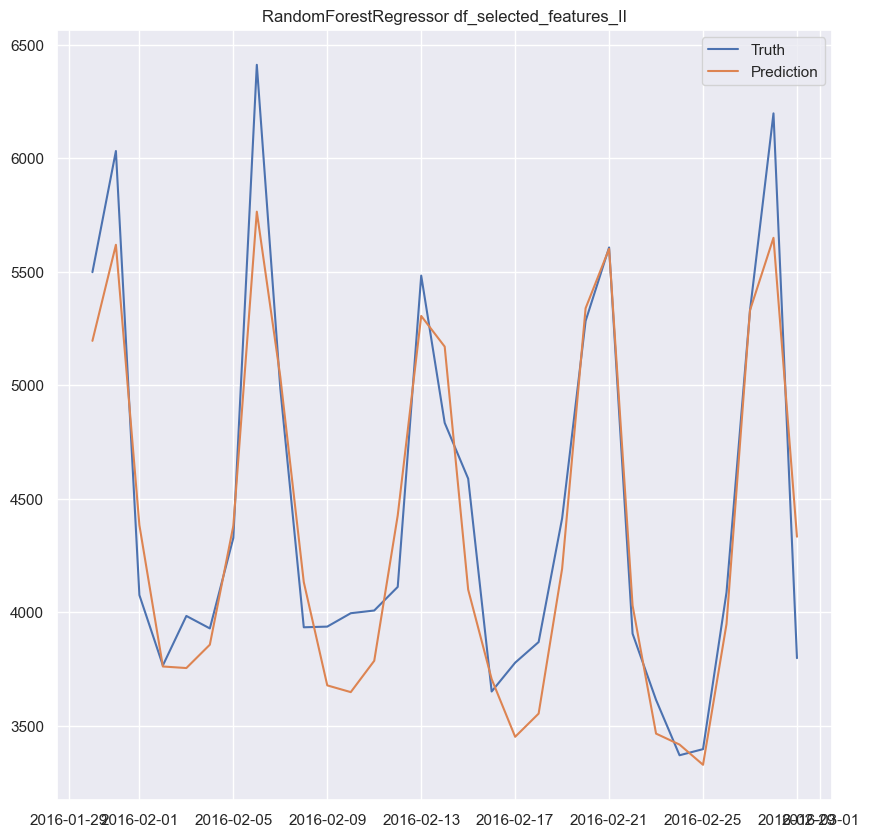

In [749]:
#Plot der Vorhersage und der tatsächlichen Werte
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor df_selected_features_II')
plt.legend(['Truth','Prediction'])

In [750]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

#Kreuuvalidierung mit TimeSeriesSplit, 5 Folds, 31 Tage Testdaten, 0 Tage Überschneidung
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_selected_features_II

#MAE und MAE MAD berechnen
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_selected_features_II,
        y=y_selected_features_II,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)

#MAE mean und MAE MAD als Vergleichsgröße ausgeben
print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 272.41
MAE mad:	 34.93


In [751]:
#Schlussendliche Prognose des Evaluationszeitraums (01.03.2016 - 31.03.2016)
forecast_rf_selected_features_II = rf_selected_features_II.fit(X_selected_features_II, y_selected_features_II) #Fit des Modells auf den gesamten Datensatz

#Vorhersage des Evaluationszeitraums und Umwandlung in das Abgabeformat.
prediction_rf_selected_features_II = pd.Series(data = forecast_rf_selected_features_II.predict(df_selected_features_II_future), index = pd.date_range(start = df_selected_features_II_future.index.min(), end = df_selected_features_II_future.index.max()))
prediction_rf_selected_features_II.index.name = 'Date'
prediction_rf_selected_features_II.name = 'sales'

#Als .csv-Datei speichern
prediction_rf_selected_features_II.to_csv('rf_selected_features_II_alldata.csv')

### 6.6 Artificial Neural Network

#### Medium Data Frame

Daten für den input layer des Neuronalen Netzwerks vorbereiten 

In [752]:
df_medium_norm = df_medium.copy()
df_medium_norm

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,2549.0,1.0,3.0,4.167098,-1.0,1.0
2011-03-02,2559.0,2.0,3.0,4.167098,-1.0,1.0
2011-03-03,2568.0,3.0,3.0,4.167098,-1.0,1.0
2011-03-04,2978.0,4.0,3.0,4.167098,-1.0,1.0
2011-03-05,4096.0,5.0,3.0,4.157467,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0.0,0.0
2016-03-28,0.0,0.0,3.0,4.489718,-1.0,0.0
2016-03-29,0.0,1.0,3.0,4.489718,-1.0,0.0


In [753]:
#Skalierung der metrischen Variable "Price"
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
norm_price = scaler.fit_transform(df_medium_norm[['price']])
df_medium_norm['price'] = norm_price
df_medium_norm

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,2549.0,1.0,3.0,0.028194,-1.0,1.0
2011-03-02,2559.0,2.0,3.0,0.028194,-1.0,1.0
2011-03-03,2568.0,3.0,3.0,0.028194,-1.0,1.0
2011-03-04,2978.0,4.0,3.0,0.028194,-1.0,1.0
2011-03-05,4096.0,5.0,3.0,0.000000,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,0.972627,0.0,0.0
2016-03-28,0.0,0.0,3.0,0.972627,-1.0,0.0
2016-03-29,0.0,1.0,3.0,0.972627,-1.0,0.0


In [754]:
#Dummy Codierung für nominale und oridnale Variablen

df_medium_norm = pd.get_dummies(
    data = df_medium_norm,
    columns = ['dayofweek','month','event_code','snap'],
    drop_first = False
)
df_medium_norm

,sales,price,dayofweek_0.0,dayofweek_1.0,dayofweek_2.0,dayofweek_3.0,dayofweek_4.0,dayofweek_5.0,dayofweek_6.0,month_1.0,...,month_10.0,month_11.0,month_12.0,event_code_-1.0,event_code_0.0,event_code_1.0,event_code_2.0,event_code_3.0,snap_0.0,snap_1.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,2549.0,0.028194,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-02,2559.0,0.028194,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-03,2568.0,0.028194,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-04,2978.0,0.028194,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2011-03-05,4096.0,0.000000,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,0.972627,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2016-03-28,0.0,0.972627,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2016-03-29,0.0,0.972627,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [755]:
#Zeitliche Aufteilung des DataFrames und Vorbereitung auf Train Test Split

df_medium_norm_past = df_medium_norm[df_medium_norm.index<'2016-03-01']
df_medium_norm_future = df_medium_norm[df_medium_norm.index>='2016-03-01']
df_medium_norm_future.drop(columns='sales',inplace=True)
X_medium_norm = df_medium_norm_past.drop(columns='sales')
y_medium_norm = df_medium_norm_past['sales']

In [756]:
#Skalierung der metrischen Variable "Sales"
from sklearn.preprocessing import StandardScaler

target_variable = df_medium_norm_past['sales'].values
TargetVarScaler=StandardScaler()
target_variable = target_variable.reshape(-1, 1)
TargetVarScalerFit=TargetVarScaler.fit(target_variable)
y_medium_norm = TargetVarScalerFit.transform(target_variable)
y_medium_norm

array([[-1.4937988 ],
       [-1.48365713],
       [-1.47452963],
       ...,
       [ 1.32558478],
       [ 2.20689569],
       [-0.22811869]])

In [757]:
#Train Test Split des skalierten Data Frames
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_medium_norm, y_medium_norm, test_size=31, shuffle = False)

In [758]:
#Aufbau/Struktur Neuronales Netzwerk mit jeweils einer Eingabe-, Versteckten und Ausgabeebene

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential()

#first layer
ann.add(Dense(units=5, input_dim=27, kernel_initializer='normal', activation='relu'))

#hidden layer
ann.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

#output layer: Das Ausgangsneuron ist ein einzelner vollständig verbundener Knoten
ann.add(Dense(1, kernel_initializer='normal'))

In [759]:
#Zusammenstellung des Modells
ann.compile(loss='mean_absolute_error', optimizer='adam')

In [760]:
#Fitten des Modells auf die Trainingsdaten
ann.fit(x_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
90/90 [==============================] - 0s 697us/step - loss: 0.7902
Epoch 2/50
90/90 [==============================] - 0s 619us/step - loss: 0.7503
Epoch 3/50
90/90 [==============================] - 0s 619us/step - loss: 0.6123
Epoch 4/50
90/90 [==============================] - 0s 607us/step - loss: 0.4553
Epoch 5/50
90/90 [==============================] - 0s 619us/step - loss: 0.4048
Epoch 6/50
90/90 [==============================] - 0s 607us/step - loss: 0.3868
Epoch 7/50
90/90 [==============================] - 0s 607us/step - loss: 0.3734
Epoch 8/50
90/90 [==============================] - 0s 585us/step - loss: 0.3645
Epoch 9/50
90/90 [==============================] - 0s 607us/step - loss: 0.3587
Epoch 10/50
90/90 [==============================] - 0s 619us/step - loss: 0.3547
Epoch 11/50
90/90 [==============================] - 0s 596us/step - loss: 0.3517
Epoch 12/50
90/90 [==============================] - 0s 619us/step - loss: 0.3496
Epoch 13/50
90/90 [======

In [761]:
#Prognosedurchführung
Predictions=ann.predict(x_test)

1/1 [==============================] - 0s 35ms/step


In [762]:
#Werte zurückskalieren
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

#Bewertung mittels Mean Absolut Error
from sklearn.metrics import mean_absolute_error as MAE
print('MAE:\t %4.2f' % (MAE(y_true = y_test_orig, y_pred = Predictions)))

MAE:	 243.62


In [763]:
#Modell auf gesamten Daten bis Ende Februar trainieren
ann.fit(X_medium_norm, y_medium_norm,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
92/92 [==============================] - 0s 638us/step - loss: 0.3371
Epoch 2/50
92/92 [==============================] - 0s 583us/step - loss: 0.3362
Epoch 3/50
92/92 [==============================] - 0s 583us/step - loss: 0.3363
Epoch 4/50
92/92 [==============================] - 0s 583us/step - loss: 0.3359
Epoch 5/50
92/92 [==============================] - 0s 594us/step - loss: 0.3362
Epoch 6/50
92/92 [==============================] - 0s 616us/step - loss: 0.3351
Epoch 7/50
92/92 [==============================] - 0s 594us/step - loss: 0.3349
Epoch 8/50
92/92 [==============================] - 0s 616us/step - loss: 0.3372
Epoch 9/50
92/92 [==============================] - 0s 605us/step - loss: 0.3354
Epoch 10/50
92/92 [==============================] - 0s 605us/step - loss: 0.3345
Epoch 11/50
92/92 [==============================] - 0s 616us/step - loss: 0.3362
Epoch 12/50
92/92 [==============================] - 0s 638us/step - loss: 0.3350
Epoch 13/50
92/92 [======

In [764]:
#Vorhersage für März 2016
prediction_ann_alldata = ann.predict(df_medium_norm_future)
prediction_ann_alldata

1/1 [==============================] - 0s 13ms/step


array([[-0.08302459],
       [-0.17547789],
       [-0.11173728],
       [ 0.5928279 ],
       [ 1.4887916 ],
       [ 1.7851211 ],
       [ 0.30101246],
       [-0.09664494],
       [-0.18909818],
       [-0.12535742],
       [ 0.13340658],
       [ 1.2406608 ],
       [ 1.4502755 ],
       [-0.14622423],
       [-0.5438813 ],
       [-0.63633466],
       [-0.85378635],
       [ 0.13197121],
       [ 1.2421706 ],
       [ 1.4520373 ],
       [-0.14446253],
       [-0.5421196 ],
       [-0.634573  ],
       [-0.513127  ],
       [ 0.13373277],
       [ 1.2404232 ],
       [ 0.69055676],
       [-0.14650145],
       [-0.5441586 ],
       [-0.6366118 ],
       [-0.57287127]], dtype=float32)

In [765]:
#Rückskalierung der vorhergesagten Werte
prediction_ann_alldata_norm = TargetVarScalerFit.inverse_transform(prediction_ann_alldata)

#Umwandlung des Arrays in eine Pandas Series
prediction_ann_alldata_norm_df = pd.DataFrame(prediction_ann_alldata_norm, index = df_medium_future.index)
prediction_ann_alldata = pd.Series(data = prediction_ann_alldata_norm_df[0])
prediction_ann_alldata.index.name = 'Date'
prediction_ann_alldata.name = 'sales'
prediction_ann_alldata

Date
2016-03-01    3940.067383
2016-03-02    3848.905518
2016-03-03    3911.755615
2016-03-04    4606.479004
2016-03-05    5489.927246
2016-03-06    5782.117188
2016-03-07    4318.739746
2016-03-08    3926.637207
2016-03-09    3835.475342
2016-03-10    3898.325928
2016-03-11    4153.475098
2016-03-12    5245.262207
2016-03-13    5451.949219
2016-03-14    3877.750488
2016-03-15    3485.648193
2016-03-16    3394.486328
2016-03-17    3180.072266
2016-03-18    4152.060059
2016-03-19    5246.750977
2016-03-20    5453.686035
2016-03-21    3879.487549
2016-03-22    3487.385254
2016-03-23    3396.223389
2016-03-24    3515.972900
2016-03-25    4153.796875
2016-03-26    5245.028320
2016-03-27    4702.842773
2016-03-28    3877.477051
2016-03-29    3485.374756
2016-03-30    3394.213135
2016-03-31    3457.063232
Name: sales, dtype: float32

In [766]:
#Speicherung als CSV-Datei
prediction_ann_alldata.to_csv('prediction_ann_alldata.csv')

kommt später bei Modellen

### 6.7 Random Forest mit Loop

Der Random Forest mit Loop soll den DF All um die Sales des Vortages durch eine andere Methodik erweitern. Für die nicht vorhandenen Sales des Evaluationszeitraumes soll für jeden einzelnen Tag ein neuer Random Forest mit den vorhandenen Daten gefittet werden und nur 1 Tag vorhersagt. Durch eine Schleife soll dies für alle 31 Tage durchgeführt werden.

In [767]:
df_medium_loop = df_all.copy()
df_medium_loop

,sales,dayofweek,month,weekofyear,yearcw,price,event_code,snap,dayofmonth,price_change_day,price_change_week,snap_since,snap_until,snap_first_or_last_day,sales_last_month_same_day,days_since_last_holiday,days_until_next_holiday,sales_yesterday,sales_last_week_same_day
date,,,,,,,,,,,,,,,,,,,
2011-04-12,2512.0,1.0,4.0,15.0,201115,4.205870,-1,0.0,12.0,0.000000,0.004538,2,18,0.0,2997.0,23,11,3015.000000,2784.000000
2011-04-13,2217.0,2.0,4.0,15.0,201115,4.205870,-1,0.0,13.0,0.000000,0.004538,3,17,0.0,2772.0,24,10,2512.000000,2602.000000
2011-04-14,2520.0,3.0,4.0,15.0,201115,4.205870,-1,0.0,14.0,0.000000,0.004538,4,16,0.0,2650.0,25,9,2217.000000,2976.000000
2011-04-15,2867.0,4.0,4.0,15.0,201115,4.205870,-1,0.0,15.0,0.000000,0.004538,5,15,0.0,3249.0,26,8,2520.000000,3294.000000
2011-04-16,3571.0,5.0,4.0,15.0,201115,4.206068,-1,0.0,16.0,0.000198,0.000198,6,14,0.0,4114.0,27,7,2867.000000,4083.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,12.0,201612,4.489718,0,0.0,27.0,0.000000,-0.000410,17,4,0.0,5607.0,0,4,5340.552508,5508.014146
2016-03-28,0.0,0.0,3.0,13.0,201613,4.489718,-1,0.0,28.0,0.000000,-0.000410,18,3,0.0,3905.0,1,3,5124.847269,3894.064786
2016-03-29,0.0,1.0,3.0,13.0,201613,4.489718,-1,0.0,29.0,0.000000,-0.000410,19,2,0.0,3613.0,2,2,3816.548502,3583.142163


In [768]:
df_medium_loop['sales_yesterday'] = df_medium_loop['sales'].shift(1) #Erstellung der Spalte "sales_yesterday" durch die vorhandenen Werte
df_medium_loop = df_medium_loop.iloc[1:] #Abschneiden der ersten Zeile, da diese keinen Wert für "sales_yesterday" enthält

df_medium_loop = df_medium_loop[df_medium_loop.index>'2011-04-11']
##DataFrame zeitlich aufteilen
df_medium_loop_past = df_medium_loop[df_medium_loop.index<'2016-03-01'] #Daten vor dem 01.03.2016 zur Modellierung
df_medium_loop_future = df_medium_loop[df_medium_loop.index>='2016-03-01'] #Daten ab dem 01.03.2016 zur letzendlichen Vorhersage
df_medium_loop_future.drop(columns='sales',inplace=True) #Spalte Sales aus den Daten für die Vorhersage entfernen
#X und y für die Modellierung definieren
X_medium_loop = df_medium_loop_past.drop(columns='sales')
y_medium_loop = df_medium_loop_past['sales']

In [769]:
y_medium_loop

date
2011-04-13    2217.0
2011-04-14    2520.0
2011-04-15    2867.0
2011-04-16    3571.0
2011-04-17    4084.0
               ...  
2016-02-25    3396.0
2016-02-26    4087.0
2016-02-27    5329.0
2016-02-28    6198.0
2016-02-29    3797.0
Name: sales, Length: 1784, dtype: float64

In [770]:
#Zunächst bauen wir eine Schleife die die Sales innerhalb von x_test je Tag vorhersagt um die Funktionalität der Schleife sicherzustellen. (Obwohl die Sales Werte hier zur Verfügung stehen)
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_medium_loop = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_medium_loop, y_medium_loop, test_size=31, shuffle = False) #Train Test Split mit 31 Tagen Testdaten

#Da für den ersten Tag des Evaluationszeitraums ein Sales Yesterday Wert verfügbar ist ???
rf_medium_loop.fit(x_train, y_train)
preds = pd.Series(rf_medium_loop.predict(x_test.iloc[0].values.reshape(1,-1))) #Sales Wert 30.01.2016 vorhersagen
x_train = x_train.append(x_test.iloc[0]) #Einfügen aller Featurewerte aus x_test für den 30.01.2016 im train set
y_train = y_train.append(preds) #Einfügen des Sales Wertes für den 30.01.2016 im train set
y_train.rename(index={0: x_test.iloc[0].name}, inplace=True) #Umbenennen des Index in den richtigen Datumswert
x_train.at[x_test.iloc[0].name,'sales_yesterday'] = x_test.iloc[0,11] 
x_test = x_test.iloc[1: , :] #Entfernen des predicteten 30.01.2016 aus dem Test Set, da wir diesen in der Schleife nicht nochmal predicten wollen

for i in range(0,30,1):
    rf_medium_loop.fit(x_train, y_train)
    preds = pd.Series(rf_medium_loop.predict(x_test.iloc[i].values.reshape(1,-1)))  #Sales Wert 31.01.2016 im ersten Durchlauf
    x_train = x_train.append(x_test.iloc[i]) #Einfügen aller Werte aus x_test für den 31.01.2016 im train set im ersten Durchlauf
    y_train = y_train.append(preds) #Einfügen des Sales Wertes für den 31.01.2016 im train set im ersten Durchlauf
    y_train.rename(index={0: x_test.iloc[i].name}, inplace=True) #Umbenennen des Index in den Datumswert
    x_train.at[x_test.iloc[i].name,'sales_yesterday'] = y_train.iloc[(len(y_train)-2)]

In [771]:
#Aggregierung der Vorhersagen
predss = y_train.tail(31)
#Berechnung und Ausgabe des MAE
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = predss)))

MAE:	 276.33


Nun soll dasselbe Vorgehen für den gesamten Datensatz und somit eine Vorhersage des Evaluationszeitraumes durchgeführt werden.

In [772]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_medium_loop = RandomForestRegressor(random_state=42)

rf_medium_loop.fit(X_medium_loop, y_medium_loop)
preds = pd.Series(rf_medium_loop.predict(df_medium_loop_future.iloc[0].values.reshape(1,-1))) #Sales Wert 01.03.2016 vorhersagen
X_medium_loop = X_medium_loop.append(df_medium_loop_future.iloc[0]) #Einfügen aller Werte aus x_test für den 01.03.2016 im train set
y_medium_loop = y_medium_loop.append(preds) #Einfügen des Sales Wertes für den 01.03.2016 im train set
y_medium_loop.rename(index={0: df_medium_loop_future.iloc[0].name}, inplace=True) #Umbenennen des Index in den richtigen Datumswert
X_medium_loop.at[df_medium_loop_future.iloc[0].name,'sales_yesterday'] = df_medium_loop_future.iloc[0,11] 
df_medium_loop_future = df_medium_loop_future.iloc[1: , :] #Entfernen des predicteten 01.03.2016 aus dem Test Set, da wir diesen in der Schleife nicht nochmal predicten wollen

for i in range(0,30,1):
    rf_medium_loop.fit(X_medium_loop, y_medium_loop)
    preds = pd.Series(rf_medium_loop.predict(df_medium_loop_future.iloc[i].values.reshape(1,-1)))  #Sales Wert 02.03.2016 im ersten Durchlauf
    X_medium_loop = X_medium_loop.append(df_medium_loop_future.iloc[i]) #Einfügen aller Werte aus x_test für den 02.03.2016 im train set im ersten Durchlauf
    y_medium_loop = y_medium_loop.append(preds) #Einfügen des Sales Wertes für den 02.03.2016 im train set im ersten Durchlauf
    y_medium_loop.rename(index={0: df_medium_loop_future.iloc[i].name}, inplace=True) #Umbenennen des Index in den Datumswert
    X_medium_loop.at[df_medium_loop_future.iloc[i].name,'sales_yesterday'] = y_medium_loop.iloc[(len(y_medium_loop)-2)]

In [ ]:
#Aggregierung der Vorhersagen
predsss = y_medium_loop.tail(31)

In [ ]:
#Umwandlung der Prognose in das Abgabeformat
prediction_rf_medium_loop_alldata = pd.Series(data = predsss, index = pd.date_range(start = predsss.index.min(), end = predsss.index.max()))
prediction_rf_medium_loop_alldata.index.name = 'Date'
prediction_rf_medium_loop_alldata.name = 'sales'

#Als .csv-Datei speichern
prediction_rf_medium_loop_alldata.to_csv('rf_medium_loop_alldata.csv')